# 1- Perkenalan
>Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama    : Reyki seprianza

Batch   : 009


# 2- Import Libraries
> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang di gunakan dalam project


In [262]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

from sklearn.metrics import classification_report, plot_roc_curve, roc_auc_score

# 3- Data loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [263]:
data = pd.read_csv('rideshare_kaggle.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [264]:
data.shape

(693071, 57)

In [265]:
# Copy Dataset

data_copy = data.copy()

In [266]:
data.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [267]:
data.tail(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


## Features

- id 		= id pengguna
- timestamp 	= waktu secara spesifik
- hour		= jam
- day		= hari
- month		= bulan
- datetime	= tanggal dan jam
- timezone	= waktu setempat(America/New_York) isiny sama semua
- source		= titik penjemputan
- destination	= titik tujuan
- cab_type	= tipe layanan
- product_id	= id produk
- name		= nama produk
- price		= harga (USD)
- distance	= Jarak tempuh (miles)
- surge_multiplier= Kenaikan harga berdasarkan banyaknya user yang menggunakan pada saat itu
- latitude	= garis lintang
- longitude	= garis bujur
- temperature	= suhu by sistem
- apparentTemperature = suhu yang di rasakan sebenarnya
- short_summary	= cuaca saat ini
- long_summary	= cuaca seharian
- precipIntensity	= intensitas curah hujan
- precipProbability = peluang hujan
- humidity	= kelembaban
- windSpeed	= kecepatan angin
- windGust	= durasi kecepatan angin
- windGustTime	= waktu angin kencang
- visibility	= jarak pandang
- temperatureHigh = suhu tinggi
- temperatureHighTime = durasi suhu tinggi
- temperatureLow = suhu rendah
- temperatureLowTime = durasi suhu rendah
- apparentTemperatureHigh = suhu tinggi sebenarnya
- apparentTemperatureHighTime waktu suhu tinggi sebenarnya
- apparentTemperatureLow = suhu rendah sebenarnya
- apparentTemperatureLowTime = waktu suhu rendah sebenarnya
- icon	= icon
- dewPoint = titik embun
- pressure	= tekanan
- windBearing	= bantalan angin
- cloudCover	= tertutup awan
- uvIndex	= index UV
- visibility.1 	= visibilitas
- ozone	= ozon
- sunriseTime = waktu matahari terbit
- sunsetTime	= waktu matahari tenggelam
- moonPhase	= fase bulan
- precipIntensityMax = intensitas hujan maksimum
- uvIndexTime = durasi waktu index UV
- temperatureMin = suhu minimum
- temperatureMinTime = waktu suhu minimum
- temperatureMax = suhu maksimum
- temperatureMaxTime = waktu suhu maksimum
- apparentTemperatureMin = suhu minimum sebenarnya
- apparentTemperatureMinTime = durasi suhu minimum sebenarnya
- apparentTemperatureMax = suhu maksimum sebenarnya
- apparentTemperatureMaxTime = durasi suhu maksimum sebenarnya

In [268]:
# Check Dataset 

data.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.0,1.544046e+09,689192.492586,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,693071.0,1.161914e+01,6.948114,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,693071.0,1.779436e+01,9.982286,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,693071.0,1.158668e+01,0.492429,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,693071.0,2.189430e+00,1.138937,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
surge_multiplier,693071.0,1.013870e+00,0.091641,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,693071.0,4.233817e+01,0.047840,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,693071.0,-7.106615e+01,0.020302,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,693071.0,3.958439e+01,6.726084,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

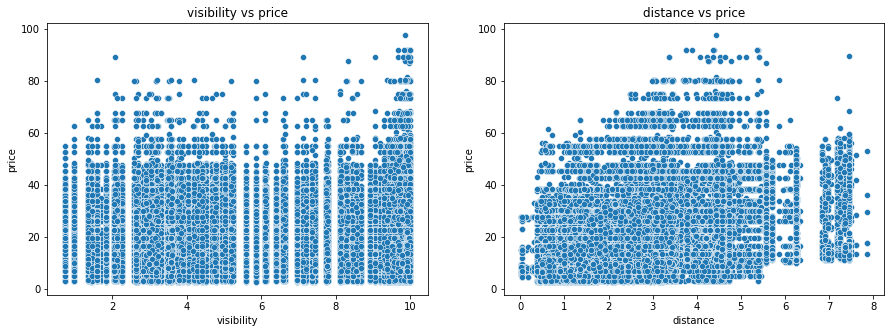

In [269]:
# Histogram

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='visibility', y='price', data=data)
plt.title('visibility vs price')


plt.subplot(1, 2, 2)
sns.scatterplot(x='distance', y='price', data=data)
plt.title('distance vs price')

plt.show()


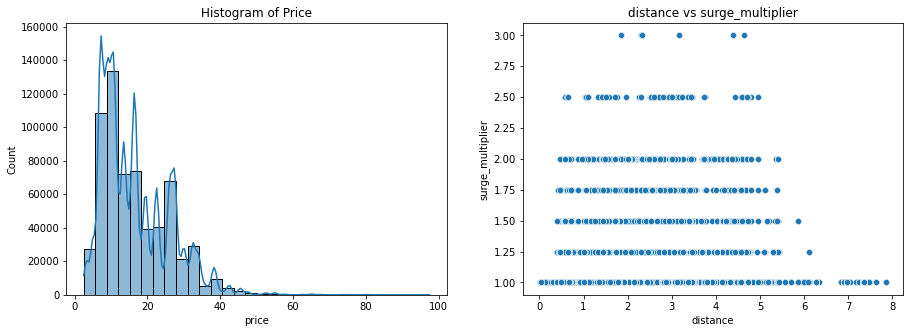

In [270]:
# Histogram

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Histogram of Price')


plt.subplot(1, 2, 2)
sns.scatterplot(x='distance', y='surge_multiplier', data=data)
plt.title('distance vs surge_multiplier')

plt.show()


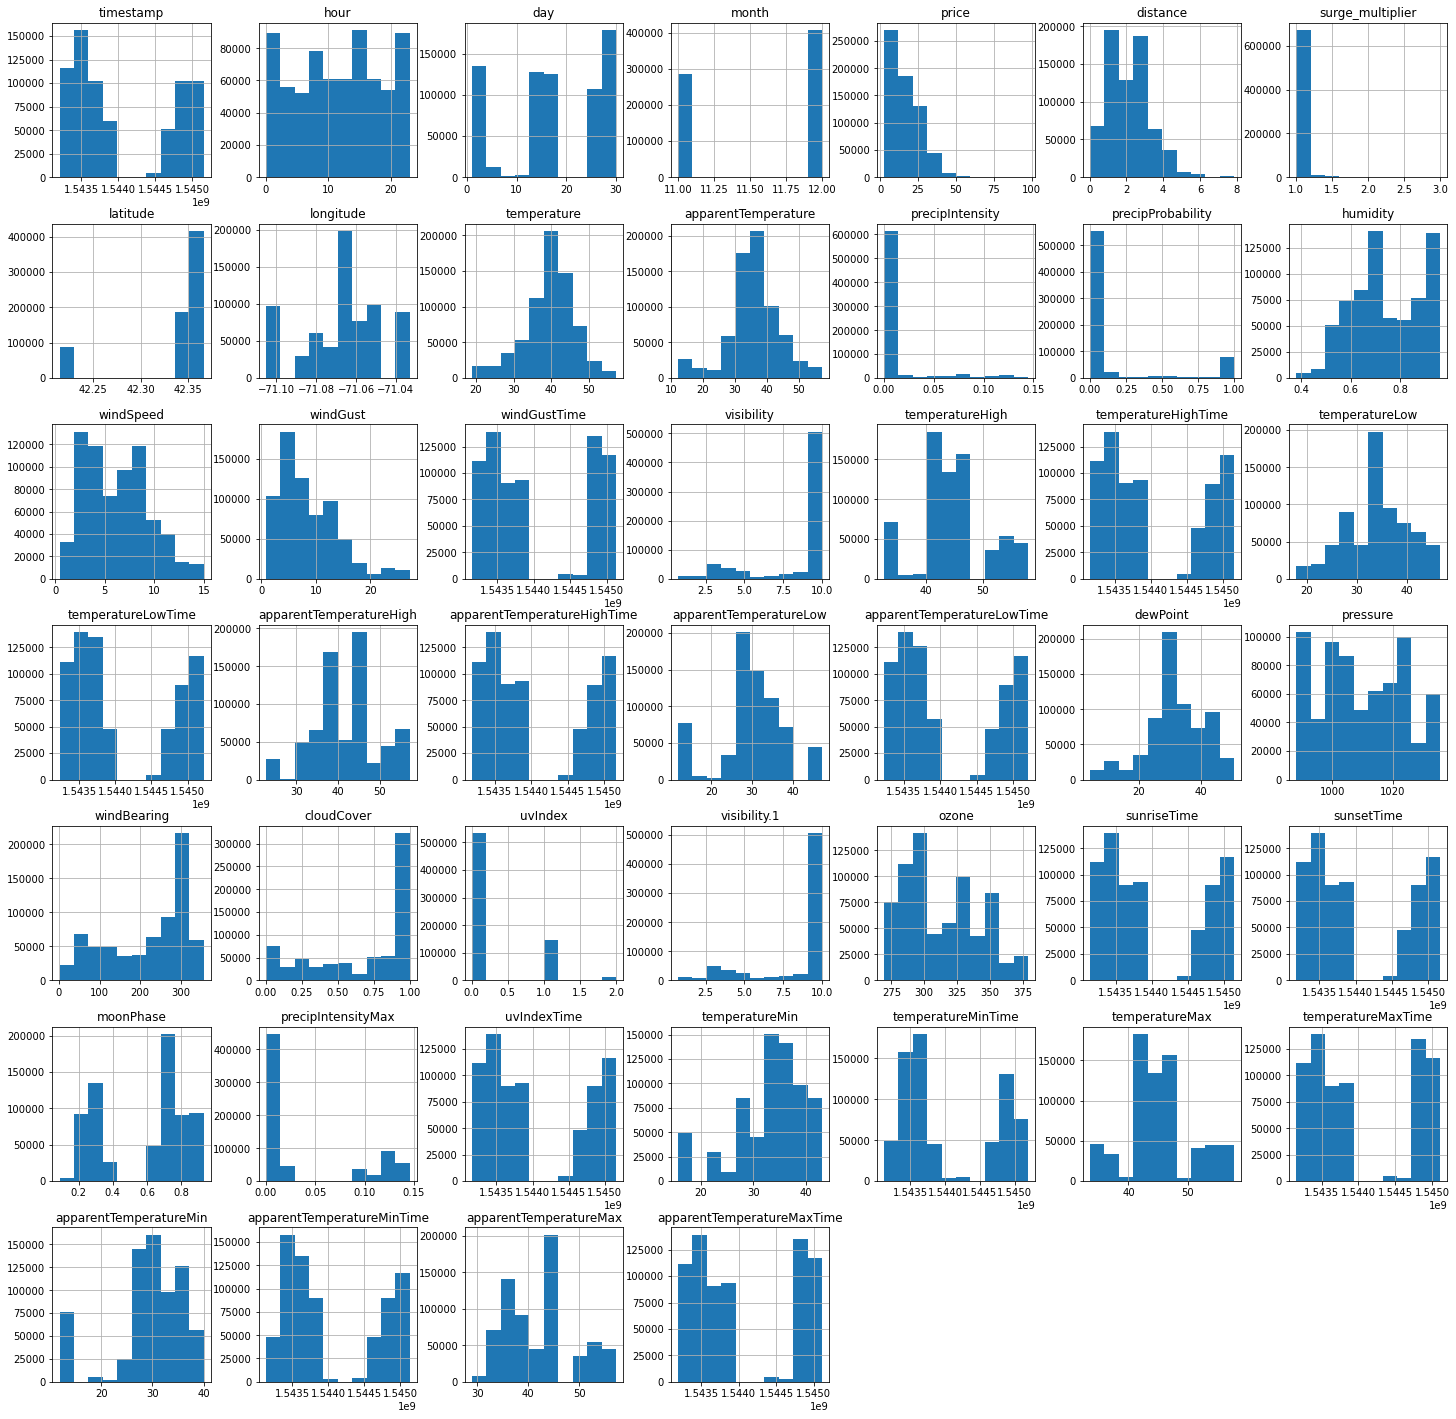

In [271]:
# Histogram plot

data.hist()
plt.gcf().set_size_inches(25, 25)
plt.show()

# 5 -Data Preprocessing

>Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.



In [272]:
data.drop(['id','product_id'], axis=1, inplace=True)

menghapus column Id karena tidak berkorelasi

In [273]:
# get data dor model inference
data_inf = data.sample(10, random_state=17)
data_inf

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,name,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
470612,1.543421e+09,16,28,11,2018-11-28 16:05:07,America/New_York,Financial District,South Station,Uber,Taxi,...,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1543399200,36.58,1543438800
685801,1.543693e+09,19,1,12,2018-12-01 19:42:59,America/New_York,Theatre District,Northeastern University,Lyft,Lyft,...,0.0000,1543683600,31.55,1543658400,44.72,1543690800,27.95,1543658400,44.05,1543690800
427160,1.545138e+09,12,18,12,2018-12-18 12:55:11,America/New_York,Haymarket Square,Theatre District,Uber,Black,...,0.0056,1545152400,22.98,1545192000,37.95,1545109200,12.13,1545134400,32.03,1545109200
499740,1.545055e+09,13,17,12,2018-12-17 13:55:03,America/New_York,Financial District,Boston University,Uber,WAV,...,0.0175,1545066000,34.14,1545044400,41.44,1545076800,28.12,1545044400,35.95,1545076800
226985,1.543448e+09,23,28,11,2018-11-28 23:41:08,America/New_York,Northeastern University,Financial District,Uber,Black,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
435550,1.544926e+09,2,16,12,2018-12-16 02:00:13,America/New_York,Financial District,Haymarket Square,Lyft,Lux Black XL,...,0.0082,1544893200,39.74,1544929200,54.29,1544896800,37.04,1544929200,53.62,1544896800
654282,1.543316e+09,10,27,11,2018-11-27 10:57:21,America/New_York,Beacon Hill,Northeastern University,Uber,UberX,...,0.1425,1543338000,36.34,1543377600,46.91,1543320000,32.43,1543377600,44.01,1543320000
493584,1.543794e+09,23,2,12,2018-12-02 23:37:57,America/New_York,Financial District,Haymarket Square,Lyft,Lux,...,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
88813,1.543800e+09,1,3,12,2018-12-03 01:27:59,America/New_York,Boston University,Theatre District,Uber,UberPool,...,0.0888,1543770000,36.60,1543726800,50.99,1543788000,35.85,1543748400,50.32,1543788000
360264,1.543565e+09,7,30,11,2018-11-30 07:58:03,America/New_York,South Station,North Station,Uber,Black SUV,...,0.0003,1543593600,28.78,1543579200,42.64,1543600800,26.35,1543575600,40.61,1543611600


In [274]:
# Remove inference set drom dataset
data_train_test = data.drop(data_inf.index)
data_train_test

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,name,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,Shared,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,Lux,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,Lux Black XL,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,Lyft XL,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,UberXL,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,UberX,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,Taxi,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,Black SUV,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [275]:
# Reset index agar tidak menimbulkan masalah
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

In [276]:
data_inf

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,name,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.543421e+09,16,28,11,2018-11-28 16:05:07,America/New_York,Financial District,South Station,Uber,Taxi,...,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1543399200,36.58,1543438800
1,1.543693e+09,19,1,12,2018-12-01 19:42:59,America/New_York,Theatre District,Northeastern University,Lyft,Lyft,...,0.0000,1543683600,31.55,1543658400,44.72,1543690800,27.95,1543658400,44.05,1543690800
2,1.545138e+09,12,18,12,2018-12-18 12:55:11,America/New_York,Haymarket Square,Theatre District,Uber,Black,...,0.0056,1545152400,22.98,1545192000,37.95,1545109200,12.13,1545134400,32.03,1545109200
3,1.545055e+09,13,17,12,2018-12-17 13:55:03,America/New_York,Financial District,Boston University,Uber,WAV,...,0.0175,1545066000,34.14,1545044400,41.44,1545076800,28.12,1545044400,35.95,1545076800
4,1.543448e+09,23,28,11,2018-11-28 23:41:08,America/New_York,Northeastern University,Financial District,Uber,Black,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
5,1.544926e+09,2,16,12,2018-12-16 02:00:13,America/New_York,Financial District,Haymarket Square,Lyft,Lux Black XL,...,0.0082,1544893200,39.74,1544929200,54.29,1544896800,37.04,1544929200,53.62,1544896800
6,1.543316e+09,10,27,11,2018-11-27 10:57:21,America/New_York,Beacon Hill,Northeastern University,Uber,UberX,...,0.1425,1543338000,36.34,1543377600,46.91,1543320000,32.43,1543377600,44.01,1543320000
7,1.543794e+09,23,2,12,2018-12-02 23:37:57,America/New_York,Financial District,Haymarket Square,Lyft,Lux,...,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
8,1.543800e+09,1,3,12,2018-12-03 01:27:59,America/New_York,Boston University,Theatre District,Uber,UberPool,...,0.0888,1543770000,36.60,1543726800,50.99,1543788000,35.85,1543748400,50.32,1543788000
9,1.543565e+09,7,30,11,2018-11-30 07:58:03,America/New_York,South Station,North Station,Uber,Black SUV,...,0.0003,1543593600,28.78,1543579200,42.64,1543600800,26.35,1543575600,40.61,1543611600


--- 
## Splitting Dataset

In [277]:
# Split between features and target

X = data_train_test.drop(['price'], axis=1)
y = data_train_test[['price']]
print(f"Training X Shape :",X.shape,"Training Y Shape :", y.shape)

Training X Shape : (693061, 54) Training Y Shape : (693061, 1)


In [278]:
# Split into train-set and test-set

from sklearn.model_selection import train_test_split

missing_index = y.price.isna()

X = X[missing_index == False]
y = y[missing_index == False]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print(f"Training X Shape", X_train.shape,"Training Y Shape :", y_train.shape)
print(f"TraiTestning X Shape :",X_test.shape,"Test Y Shape :", y_test.shape)

Training X Shape (510373, 54) Training Y Shape : (510373, 1)
TraiTestning X Shape : (127594, 54) Test Y Shape : (127594, 1)


--- 
### Handling Missing Value train

In [279]:
X_train.isnull().sum()

timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
name                           0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTemperatureHigh        0
apparentTe

> tidak ada missing value di data train


---
### Handling missing value test

Skewness :  1.0457532280060173


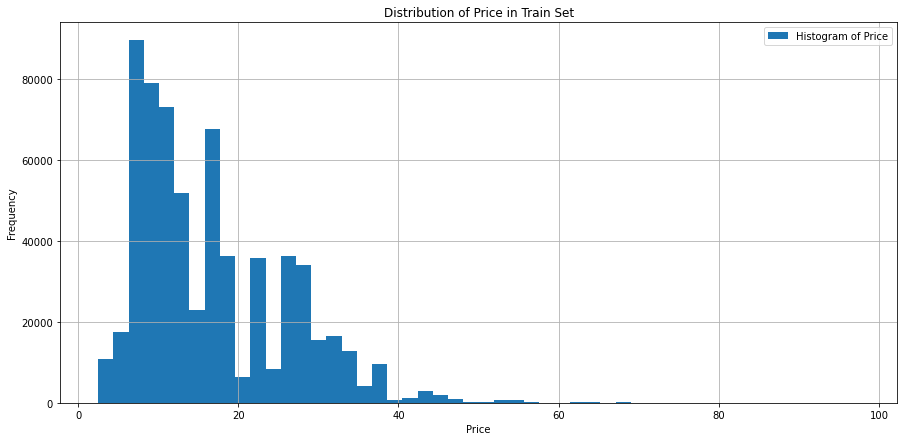

In [280]:
# Let's Check Type of Distirbution of Variable `price`
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

data_train_test.price.hist(bins=50, ax=ax, label='Histogram of Price') # Histogram of original dataset
ax.set_title('Distribution of Price in Train Set')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
ax.legend(loc="upper right")

print('Skewness : ', data_train_test.price.skew())

---
### Handling Outlier

In [281]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    print(variable)
    fig, ax = plt.subplots(1, 2, figsize=(24, 8))
    sns.histplot(X_train[variable], bins=30, ax=ax[0])
    for tick in ax[0].get_xticklabels():
        tick.set_rotation(45)
    ax[0].set_title(f'Histogram')

    # Boxplot
    try: 
        sns.boxplot(y=X_train[variable], ax=ax[1])
        ax[1].set_title('Boxplot')
    except Exception as e:
        # sns.scatterplot(X_train[variable], X_train['price'], ax=ax[1])
        # ax[1].set_title('Boxplot')
        print(' Variabel ini tidak bisa di berikan Boxplot')
    plt.show();

hour


<Figure size 1152x288 with 0 Axes>

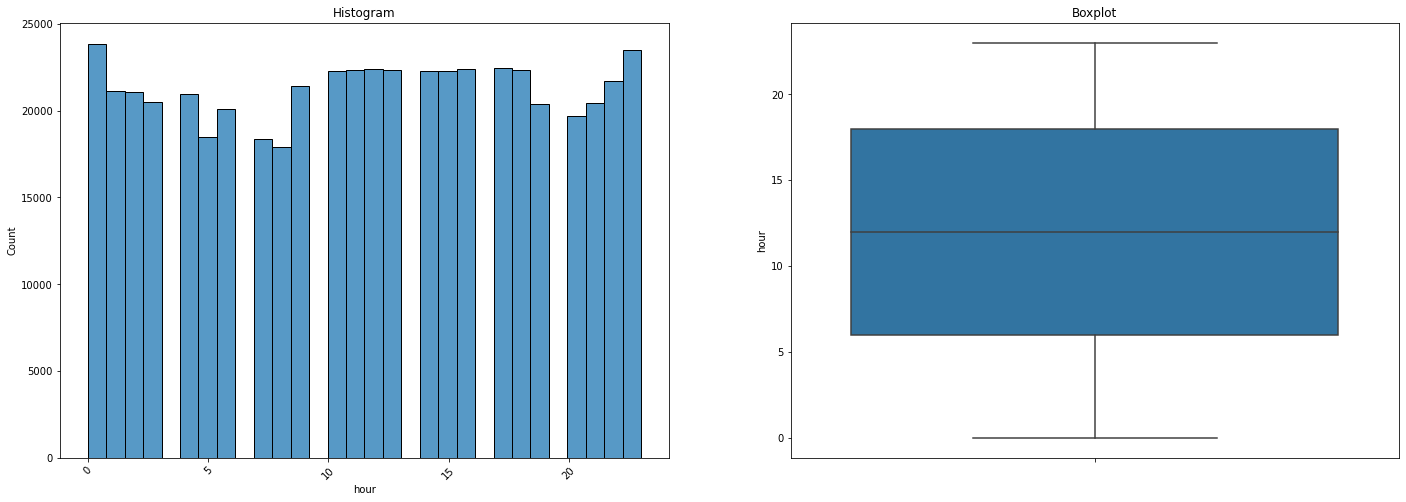

day


<Figure size 1152x288 with 0 Axes>

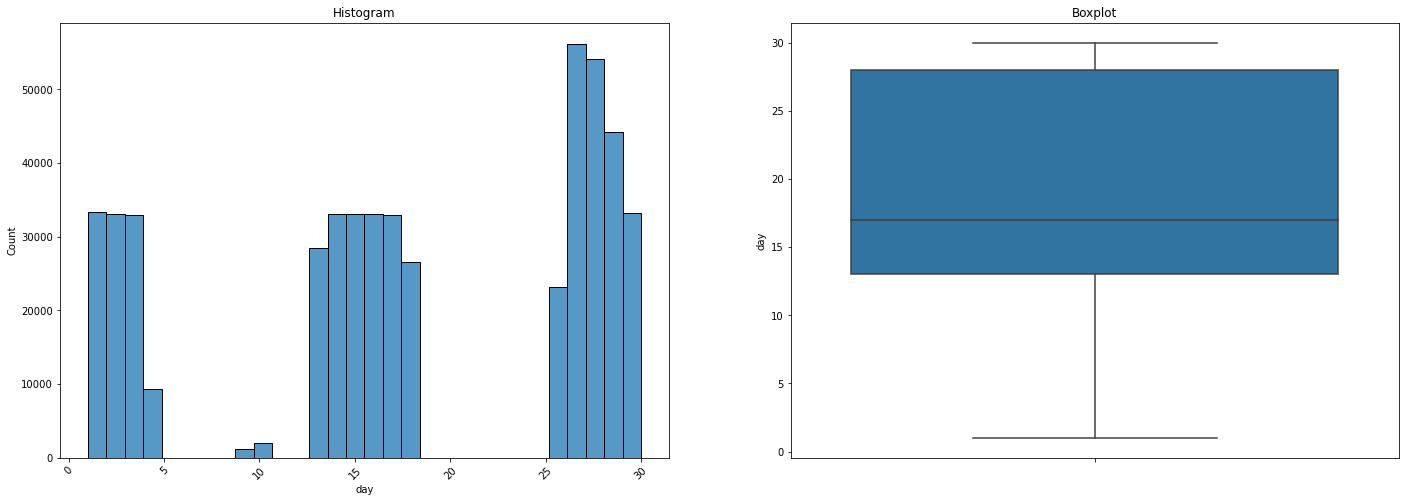

month


<Figure size 1152x288 with 0 Axes>

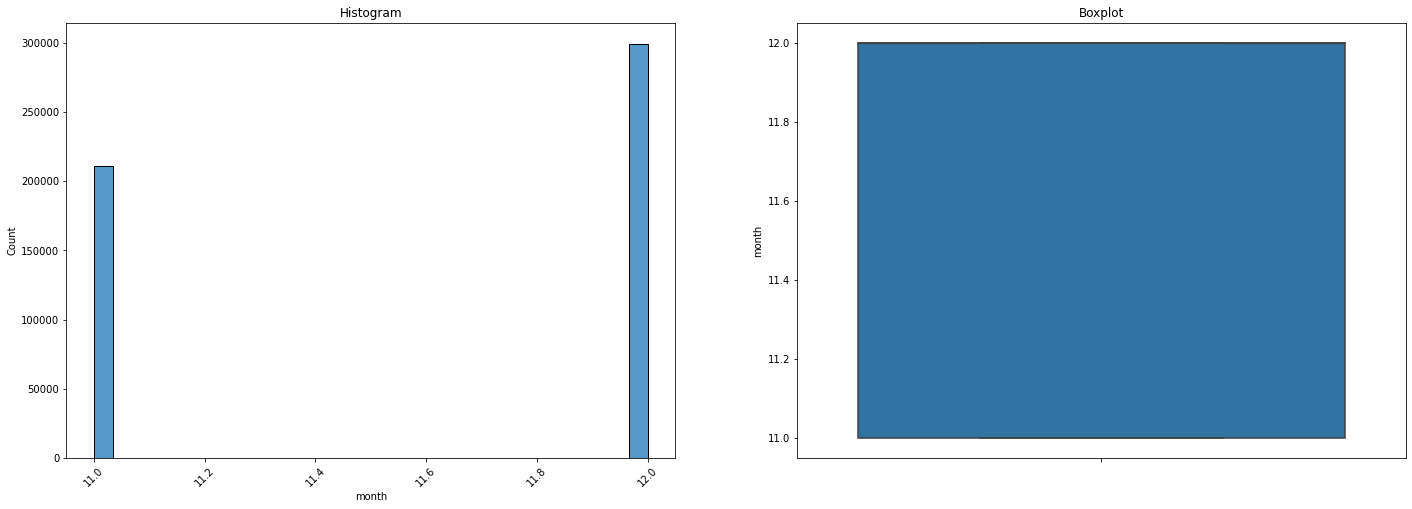

source
 Variabel ini tidak bisa di berikan Boxplot


<Figure size 1152x288 with 0 Axes>

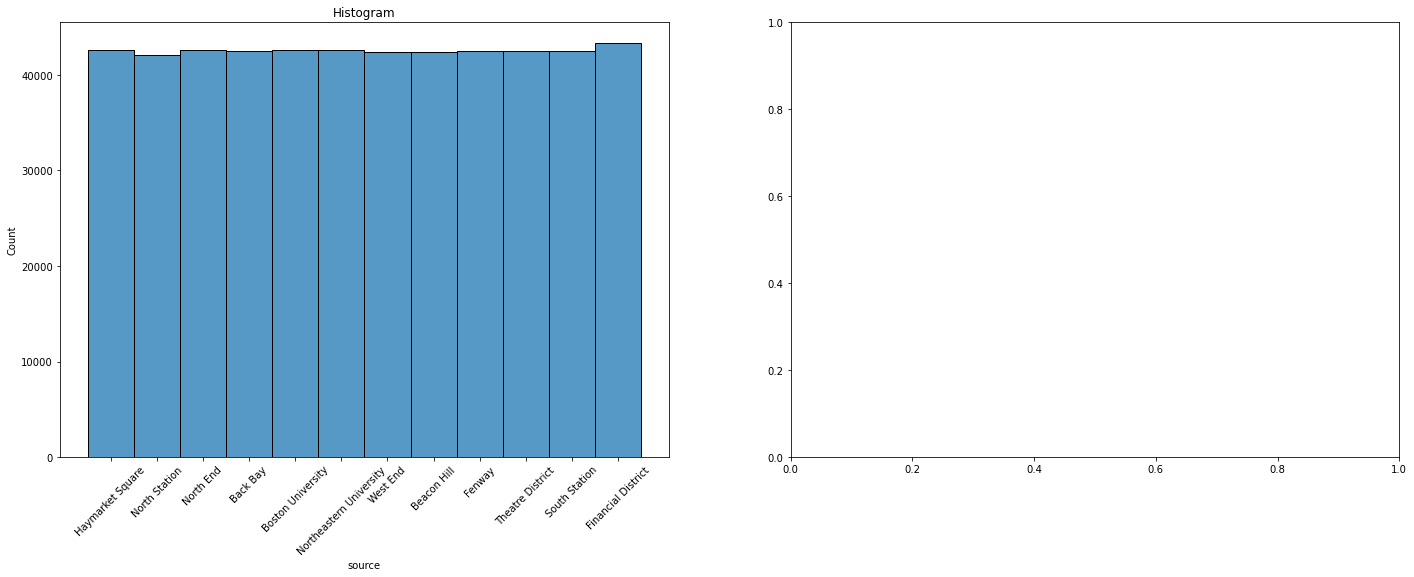

destination
 Variabel ini tidak bisa di berikan Boxplot


<Figure size 1152x288 with 0 Axes>

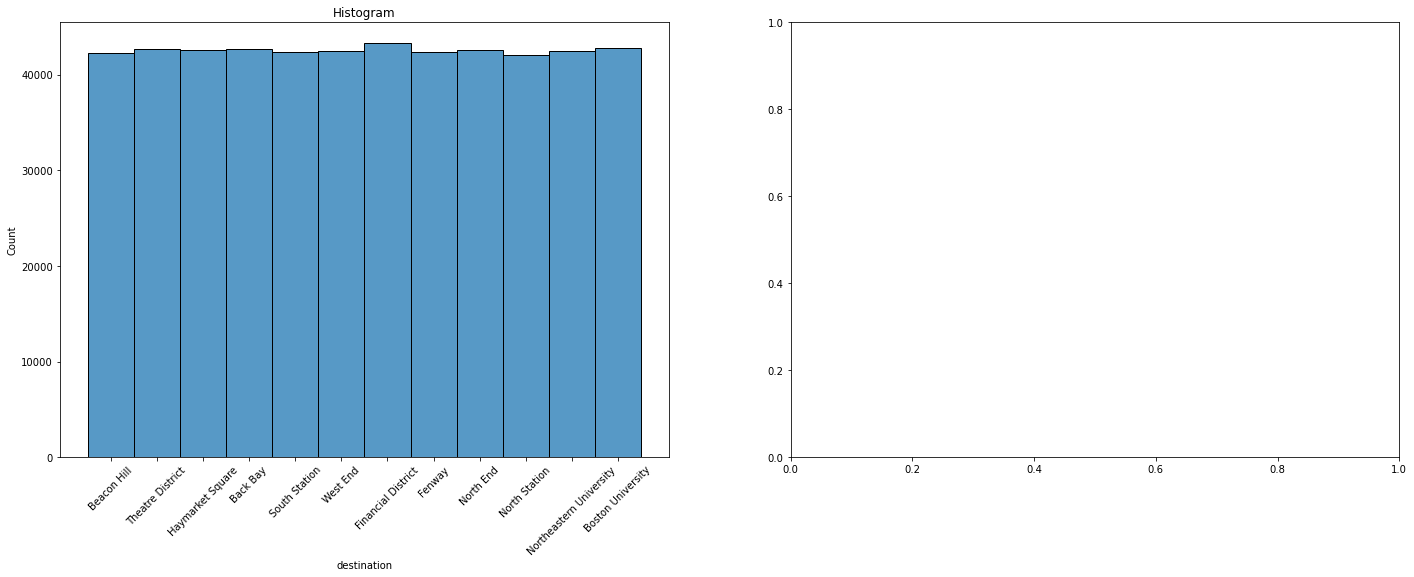

cab_type
 Variabel ini tidak bisa di berikan Boxplot


<Figure size 1152x288 with 0 Axes>

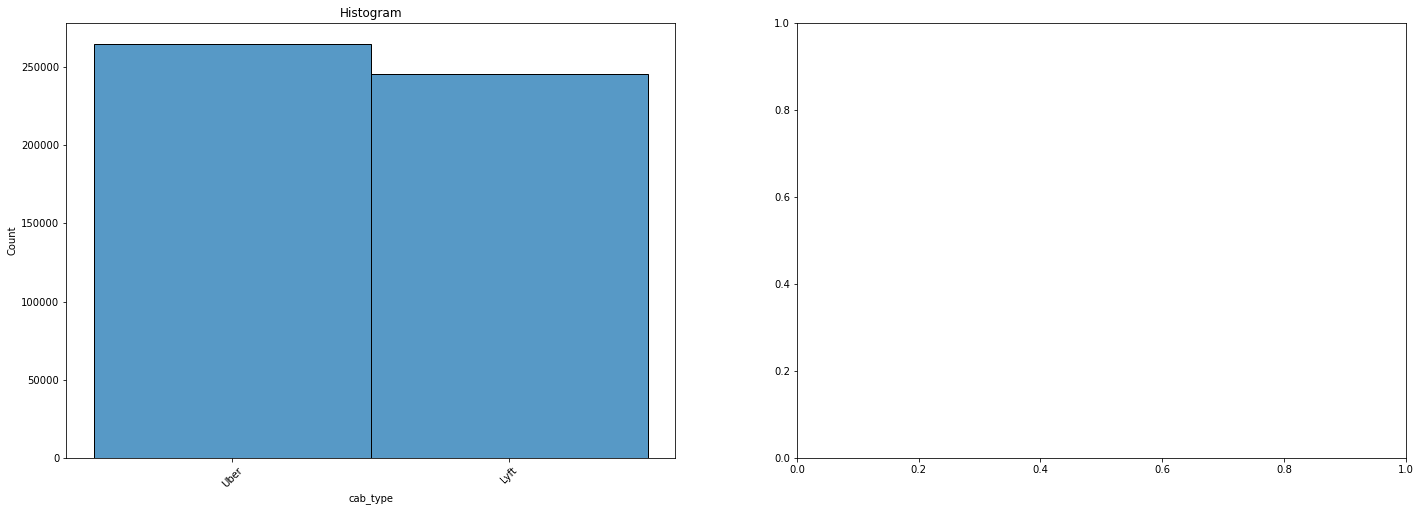

name
 Variabel ini tidak bisa di berikan Boxplot


<Figure size 1152x288 with 0 Axes>

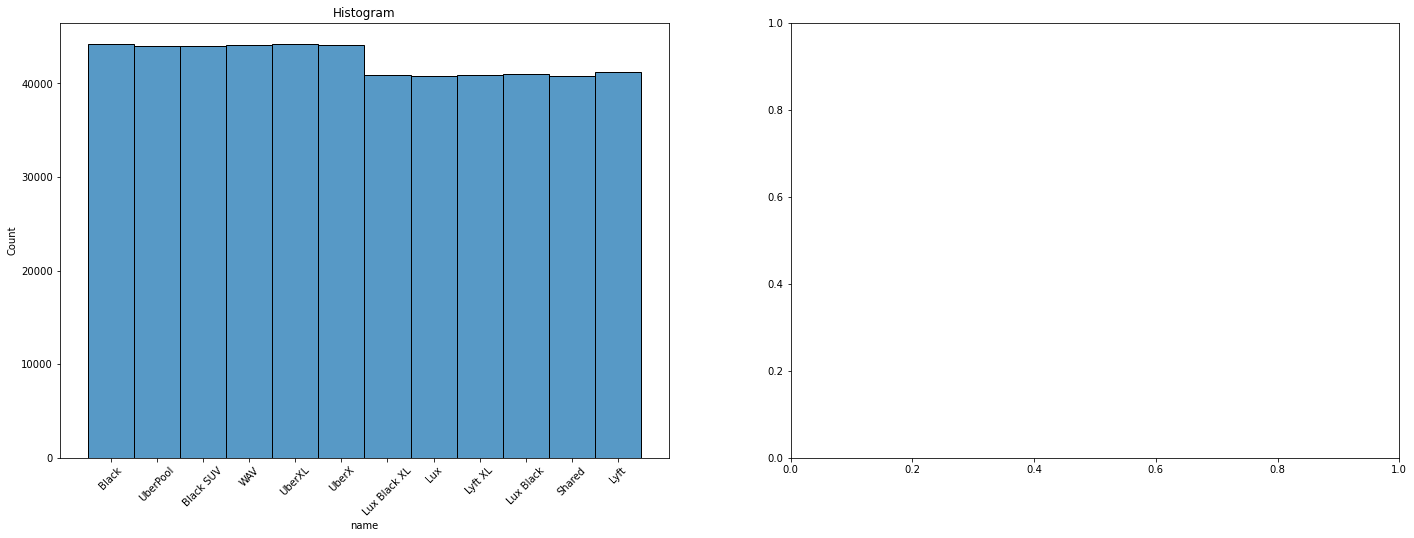

distance


<Figure size 1152x288 with 0 Axes>

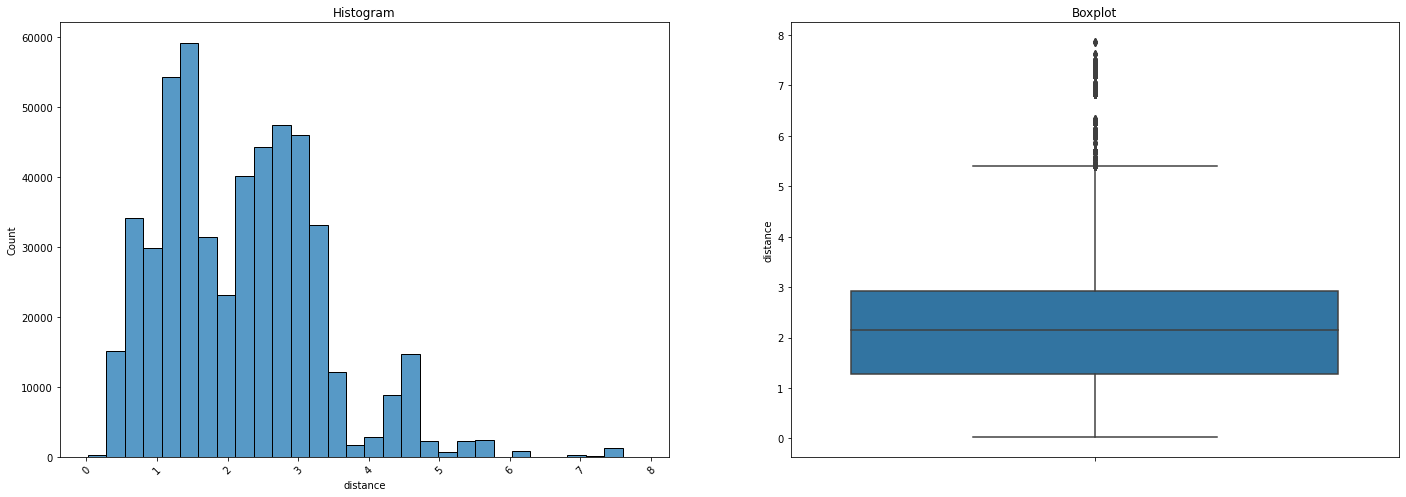

surge_multiplier


<Figure size 1152x288 with 0 Axes>

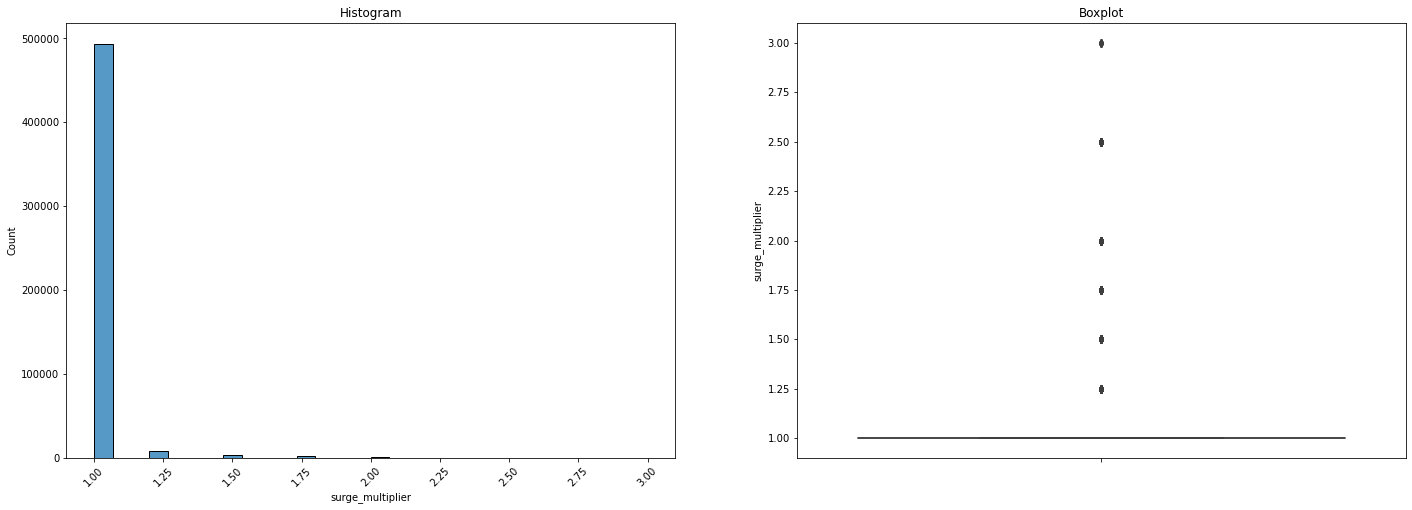

latitude


<Figure size 1152x288 with 0 Axes>

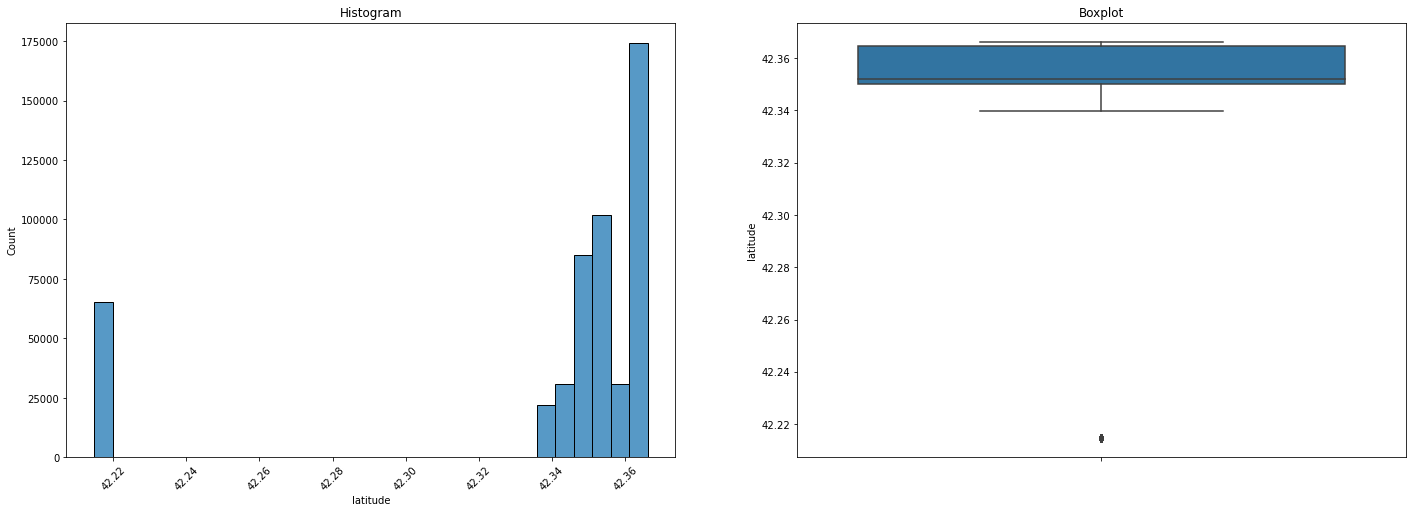

longitude


<Figure size 1152x288 with 0 Axes>

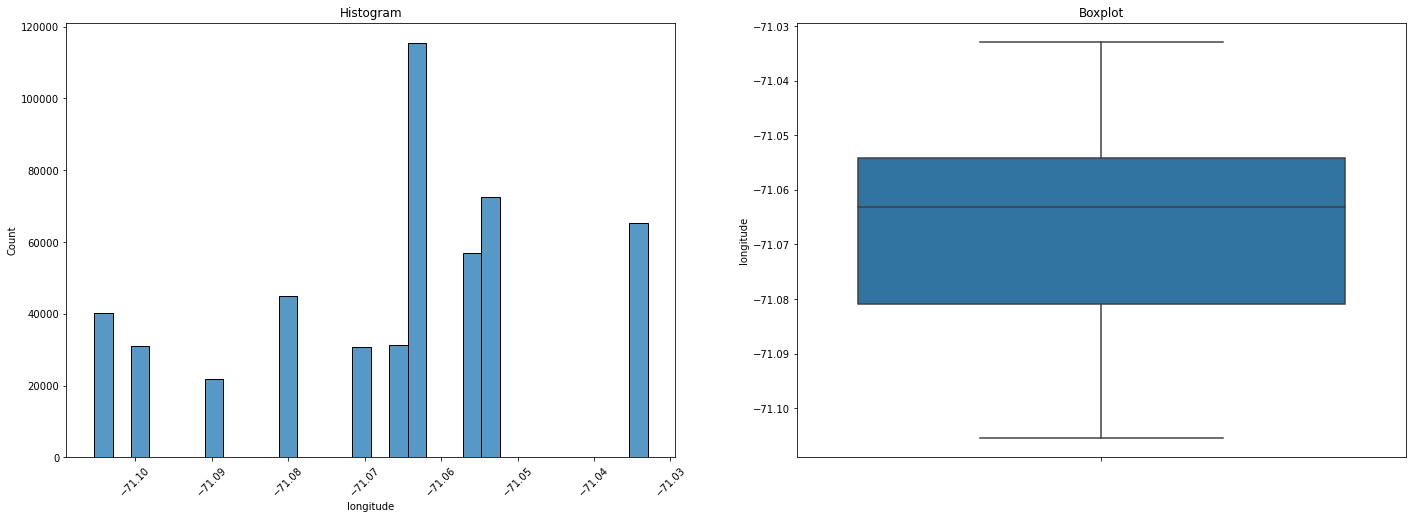

temperature


<Figure size 1152x288 with 0 Axes>

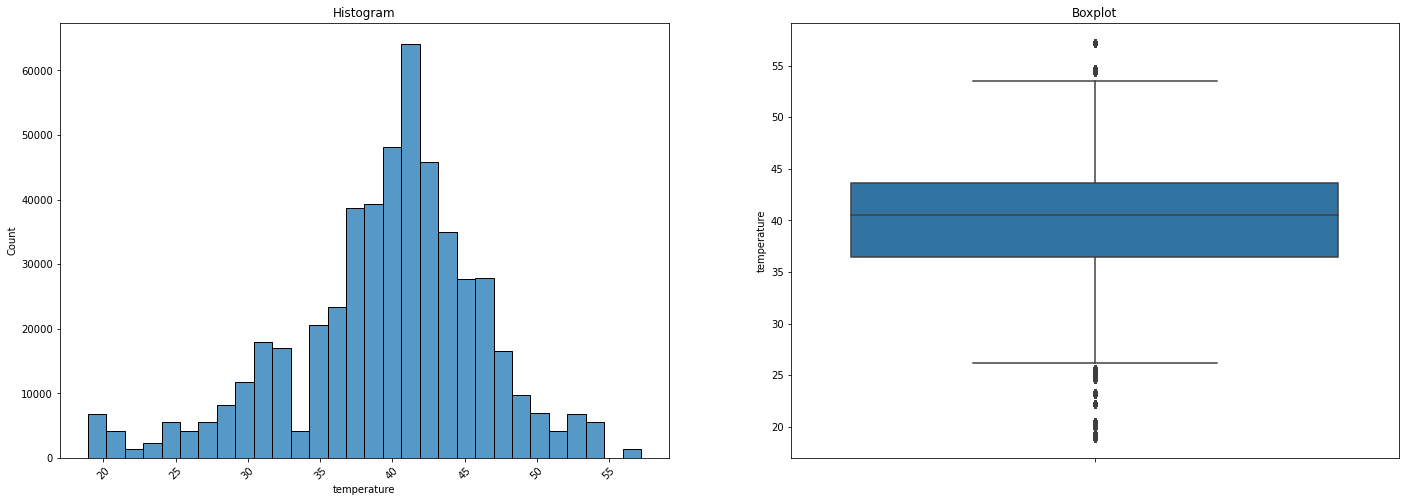

apparentTemperature


<Figure size 1152x288 with 0 Axes>

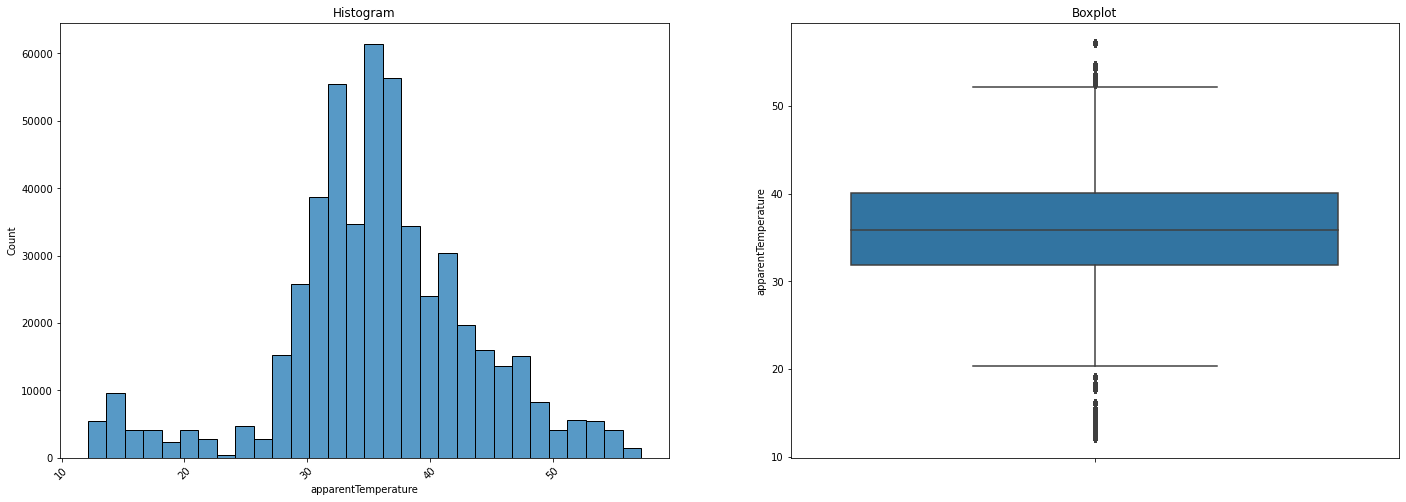

short_summary
 Variabel ini tidak bisa di berikan Boxplot


<Figure size 1152x288 with 0 Axes>

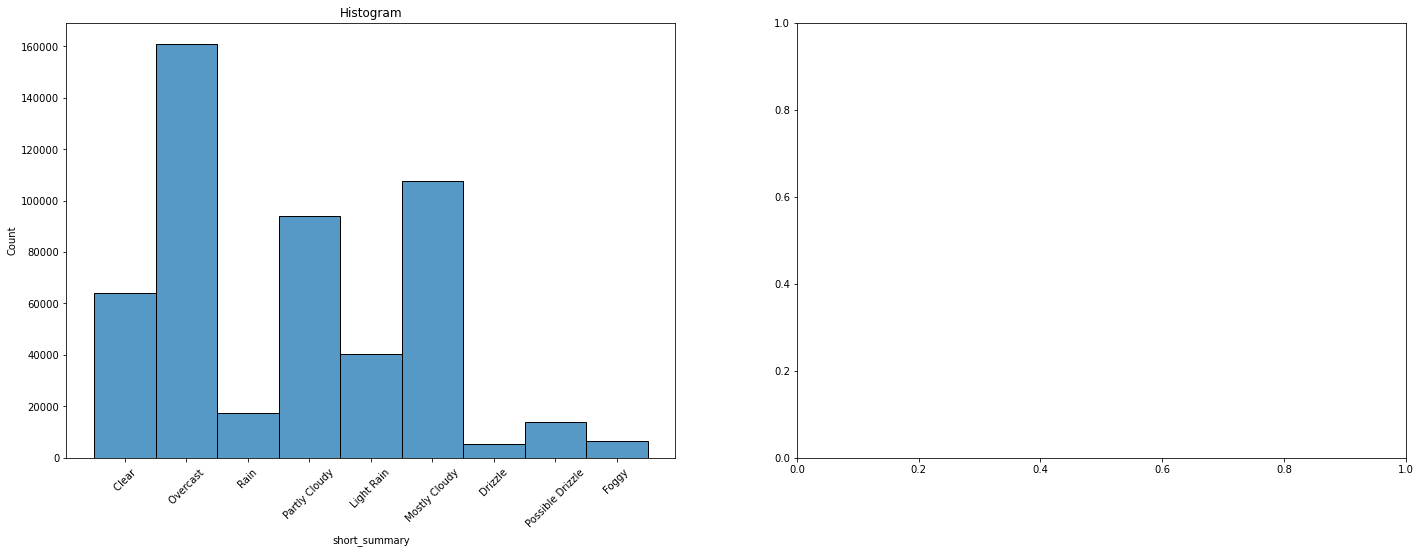

long_summary
 Variabel ini tidak bisa di berikan Boxplot


<Figure size 1152x288 with 0 Axes>

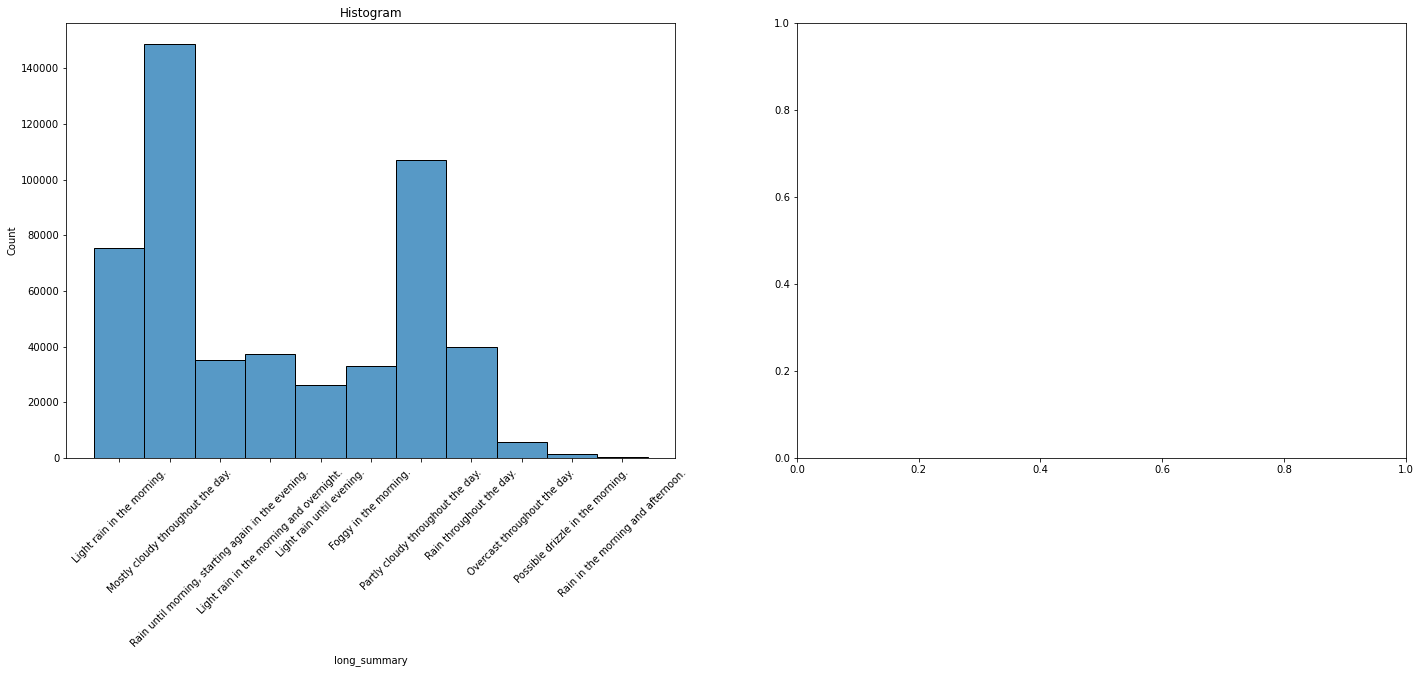

precipIntensity


<Figure size 1152x288 with 0 Axes>

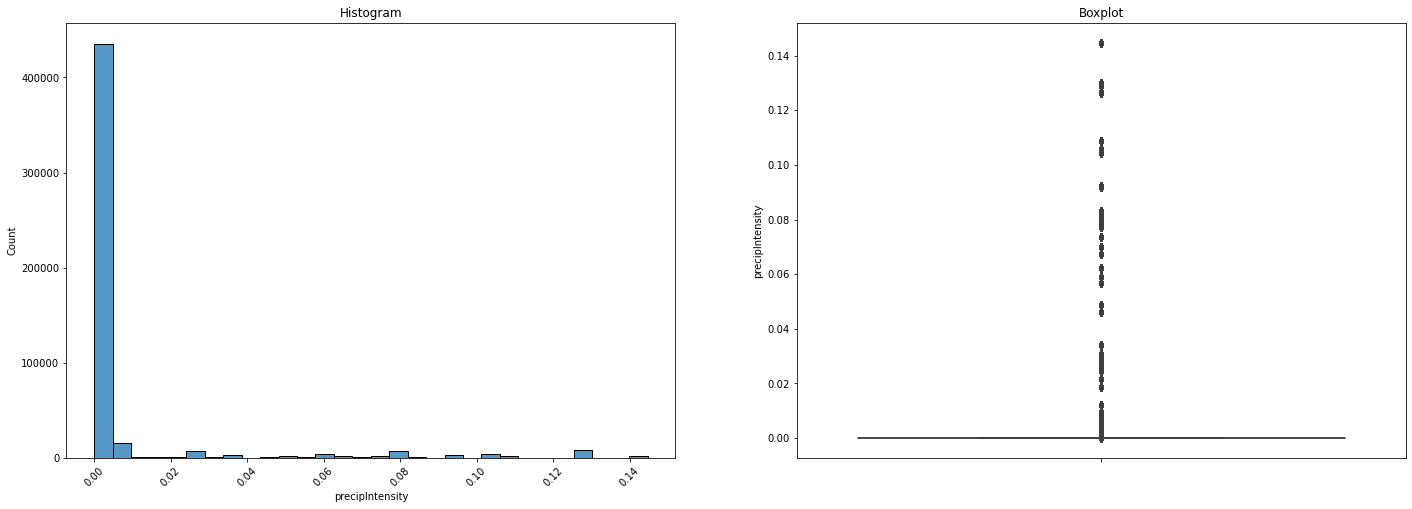

precipProbability


<Figure size 1152x288 with 0 Axes>

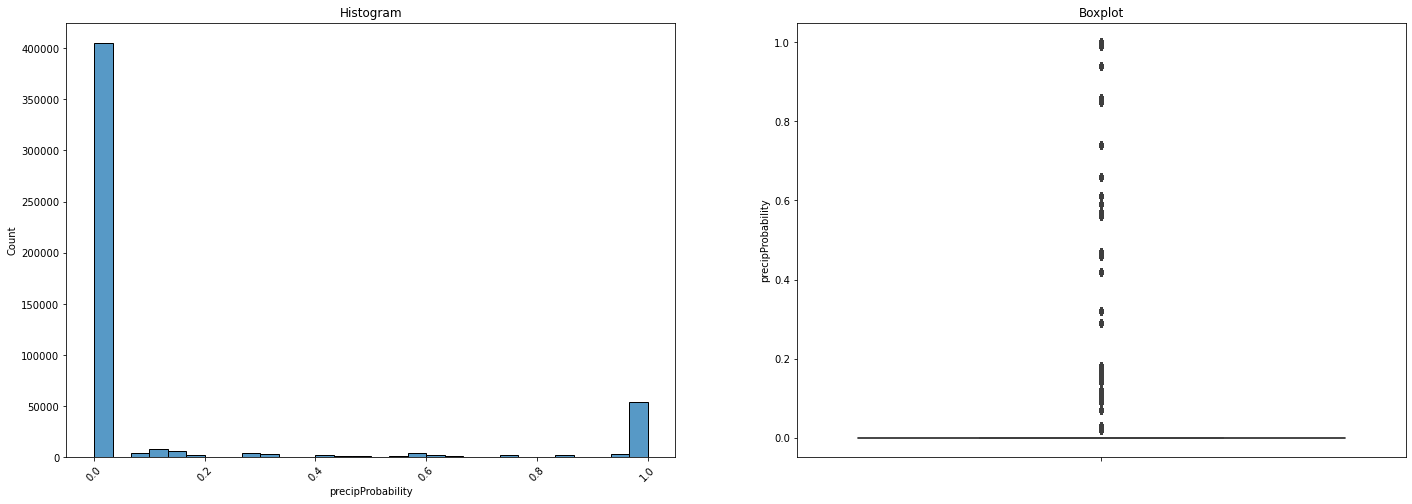

humidity


<Figure size 1152x288 with 0 Axes>

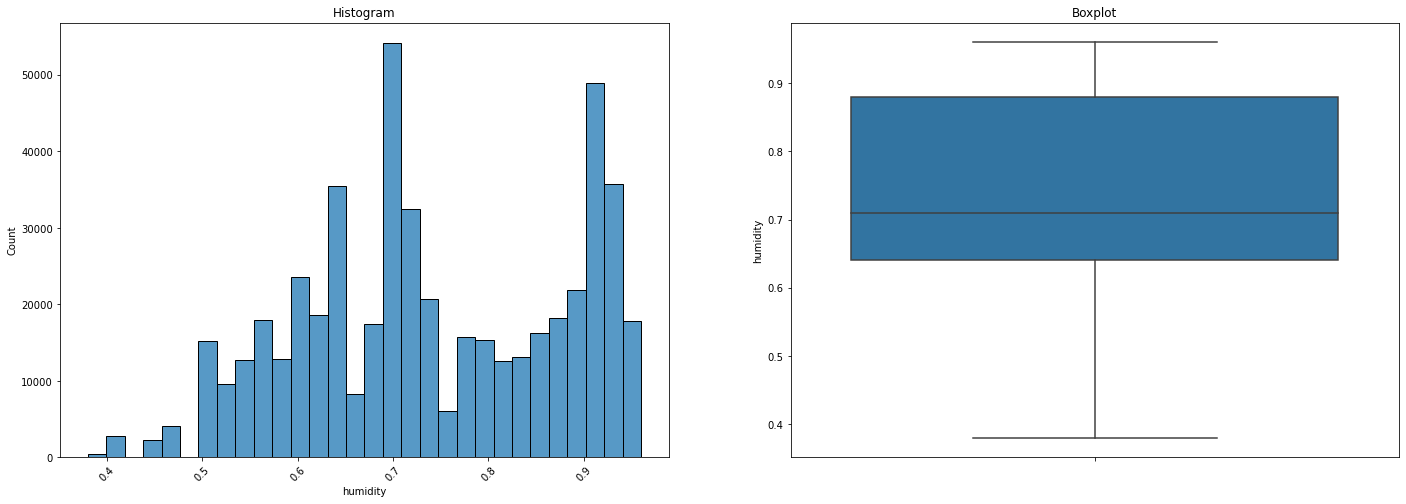

windSpeed


<Figure size 1152x288 with 0 Axes>

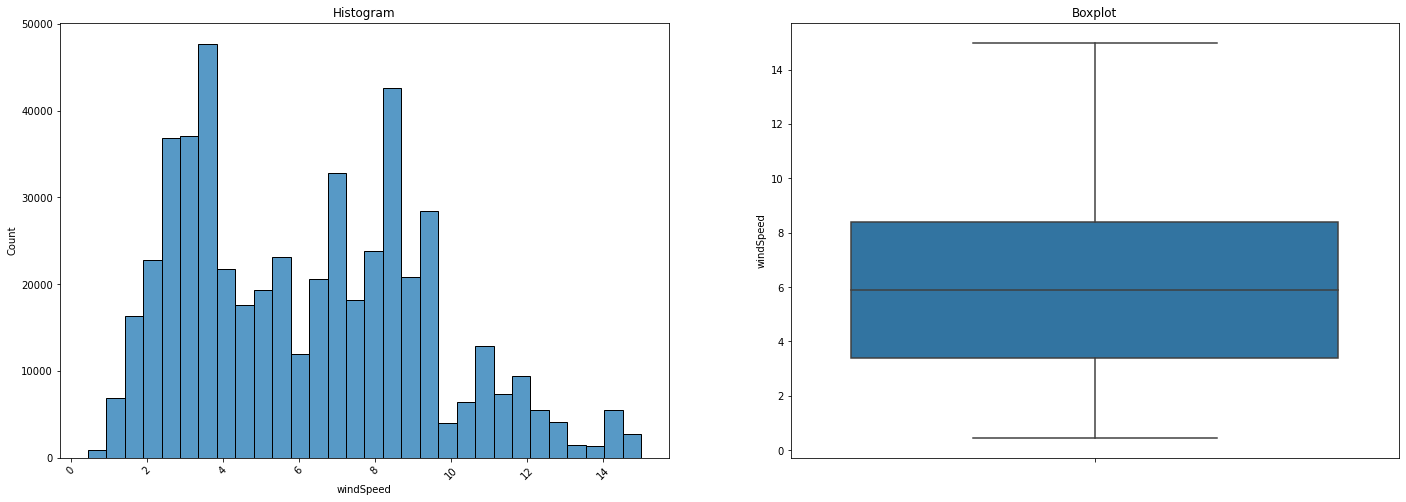

windGust


<Figure size 1152x288 with 0 Axes>

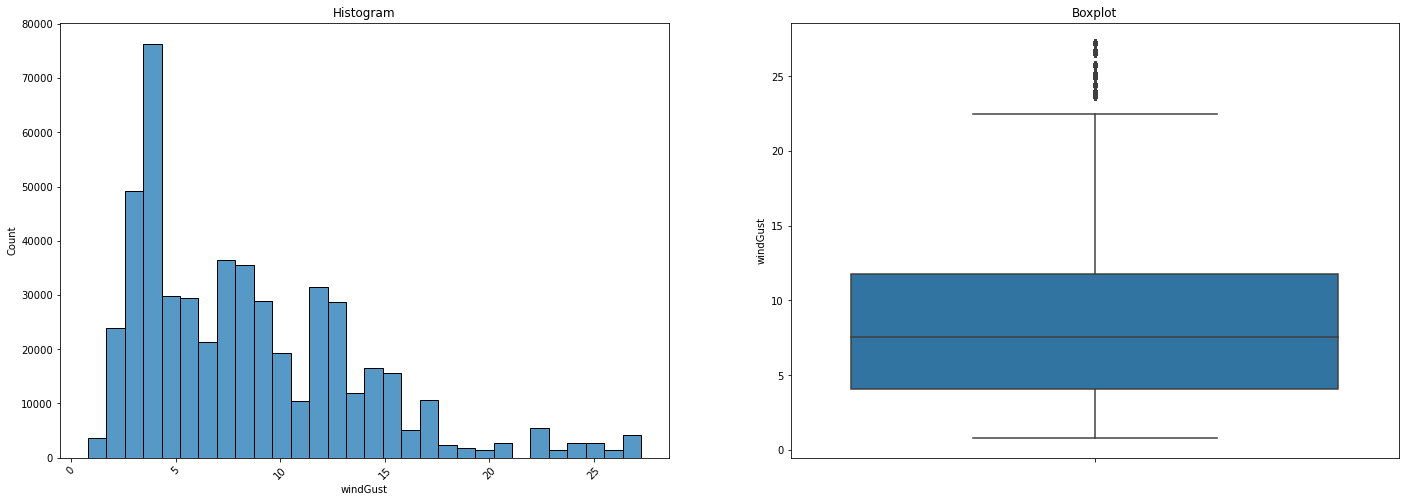

visibility


<Figure size 1152x288 with 0 Axes>

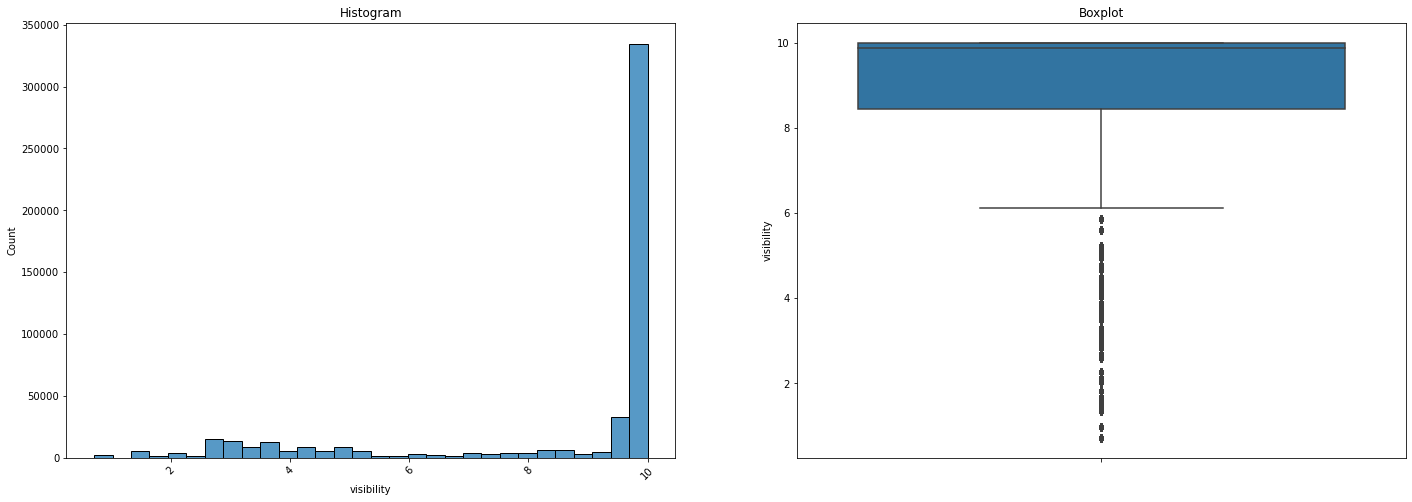

temperatureHigh


<Figure size 1152x288 with 0 Axes>

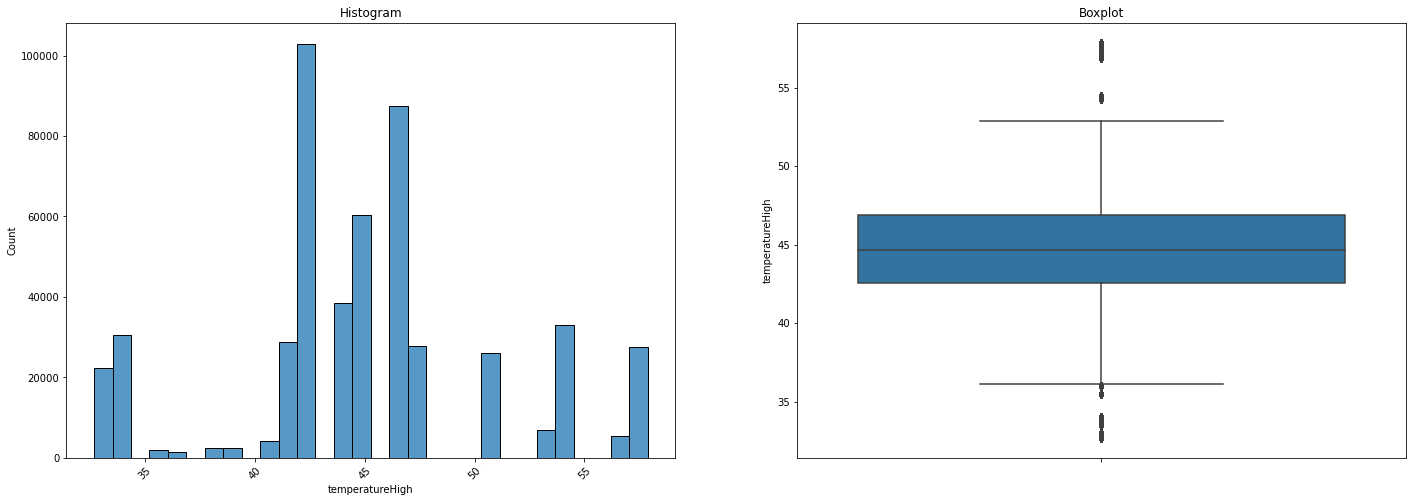

temperatureLow


<Figure size 1152x288 with 0 Axes>

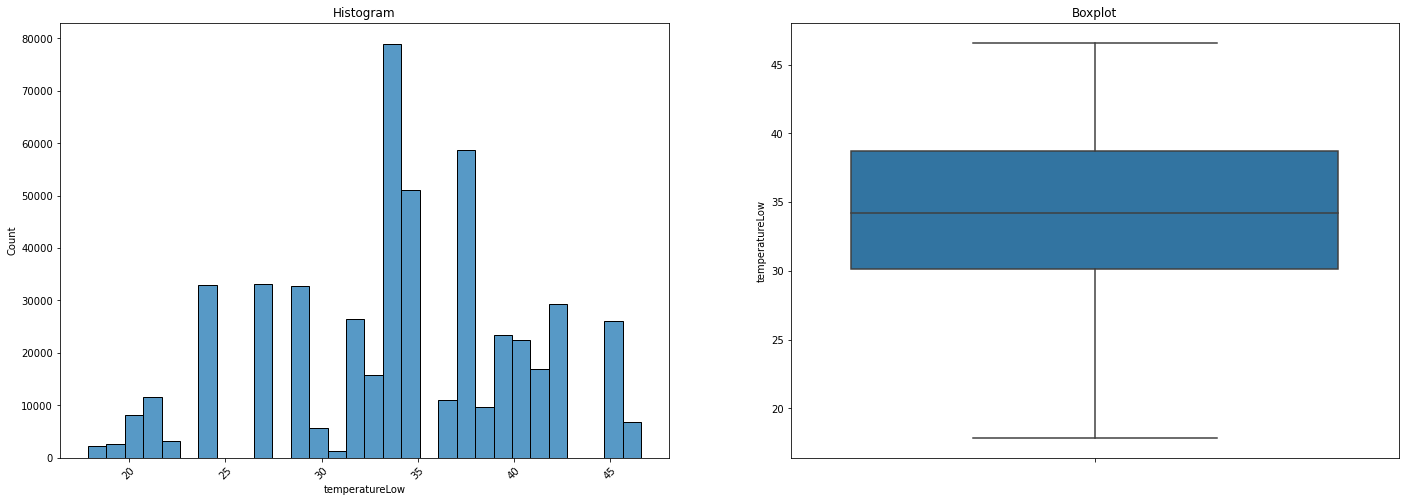

apparentTemperatureHigh


<Figure size 1152x288 with 0 Axes>

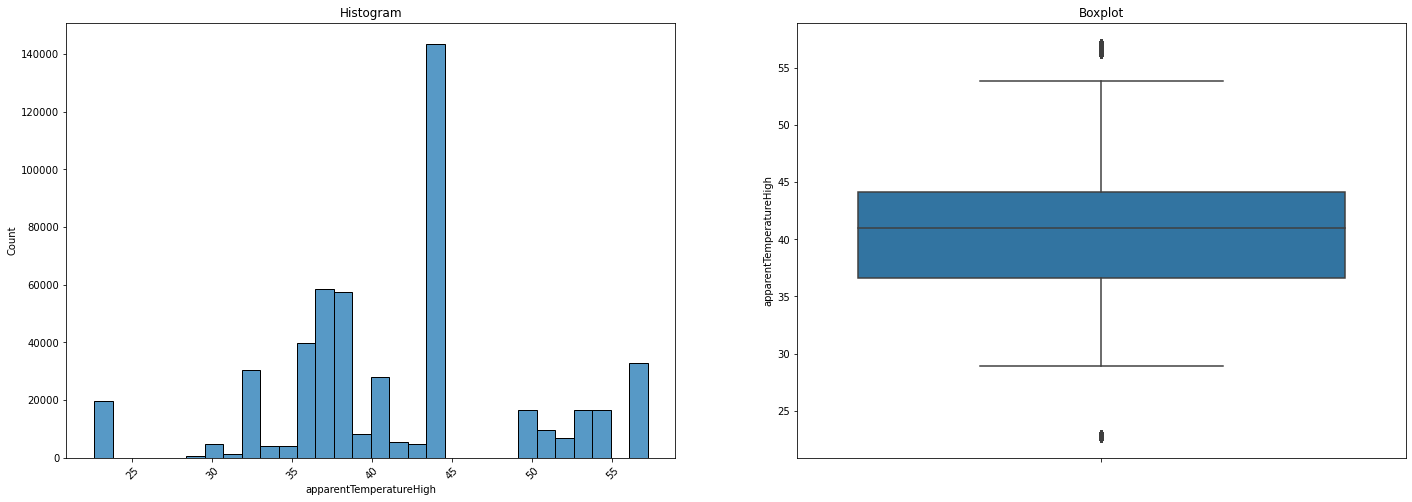

apparentTemperatureLow


<Figure size 1152x288 with 0 Axes>

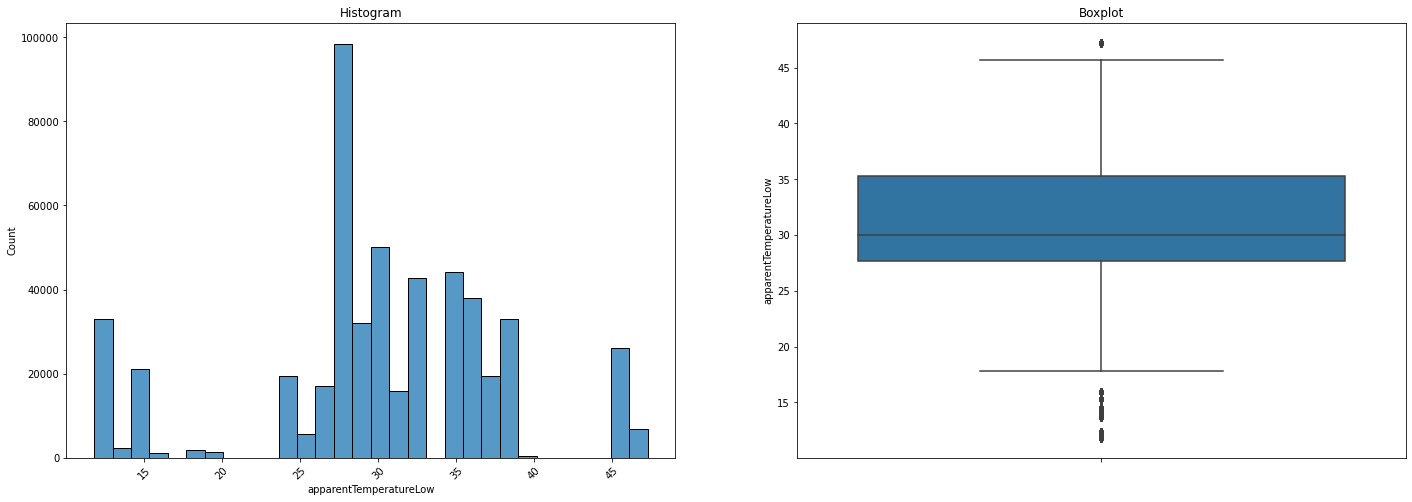

icon
 Variabel ini tidak bisa di berikan Boxplot


<Figure size 1152x288 with 0 Axes>

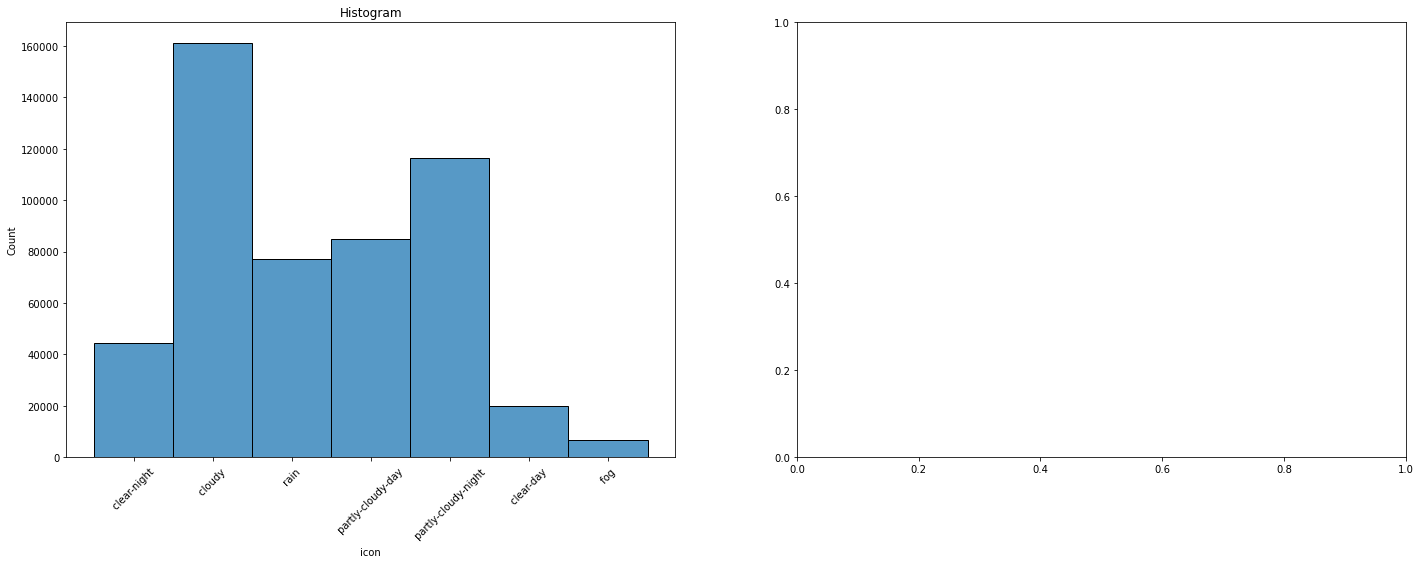

dewPoint


<Figure size 1152x288 with 0 Axes>

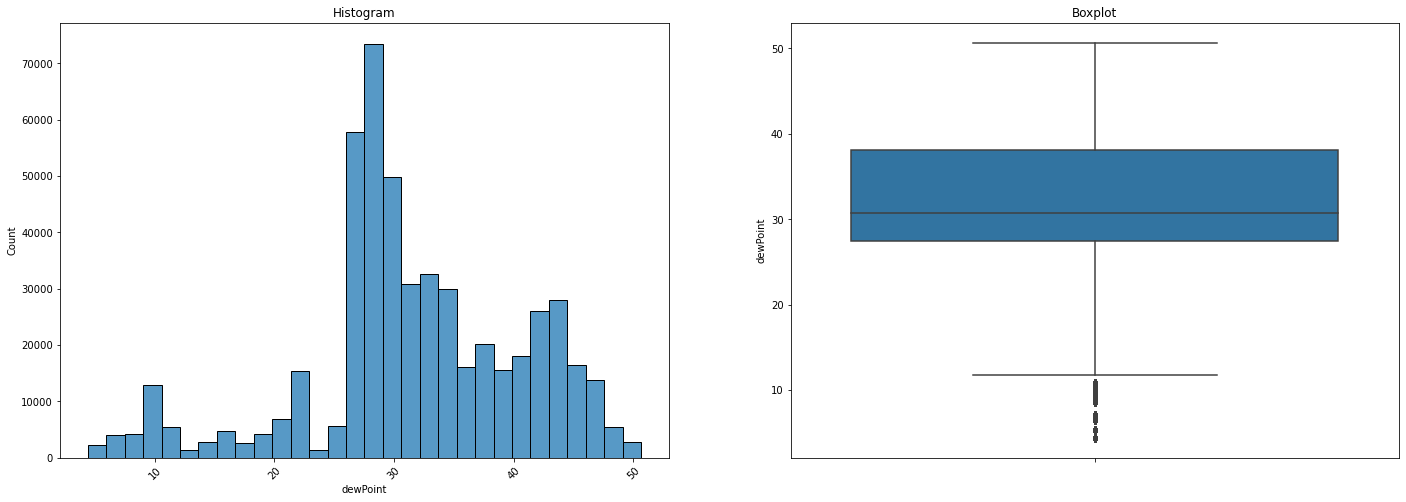

pressure


<Figure size 1152x288 with 0 Axes>

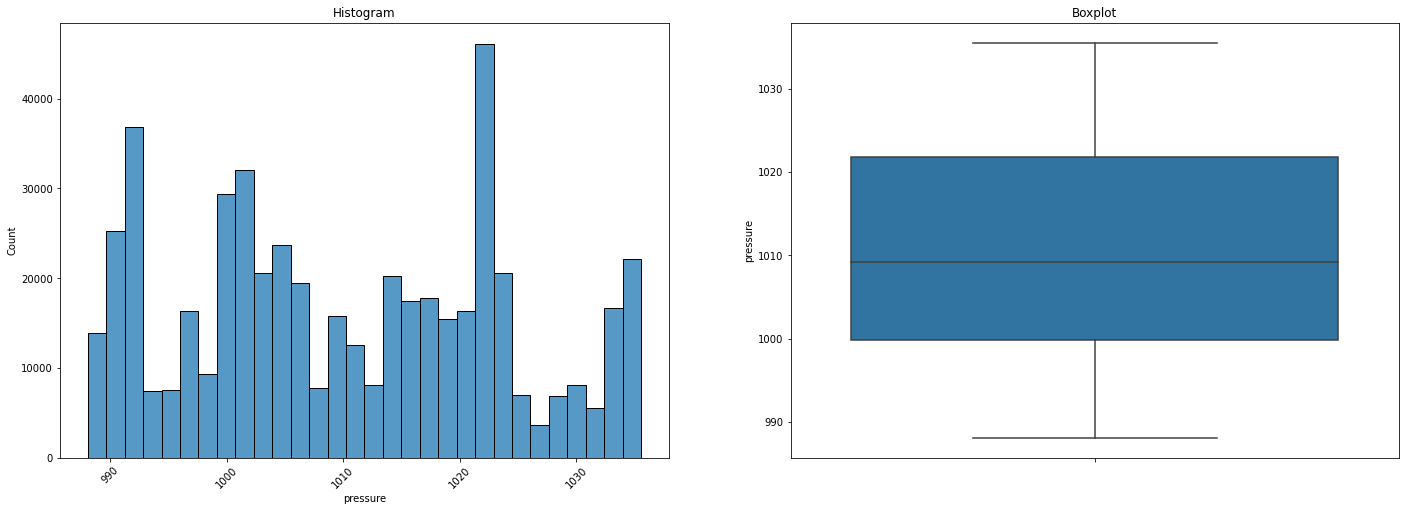

windBearing


<Figure size 1152x288 with 0 Axes>

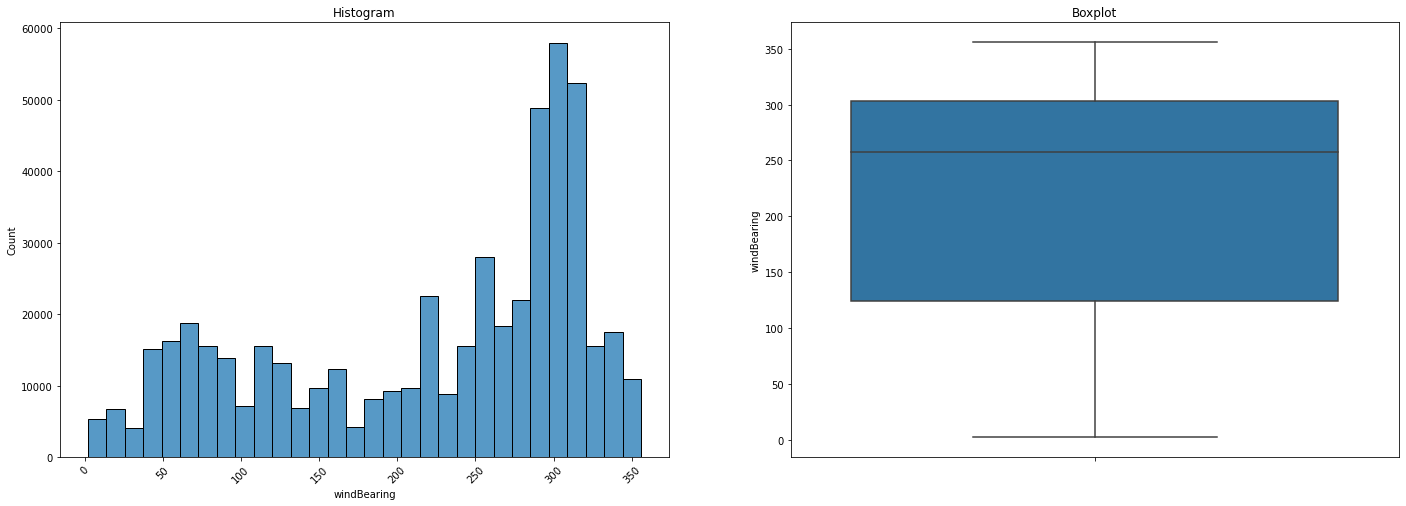

cloudCover


<Figure size 1152x288 with 0 Axes>

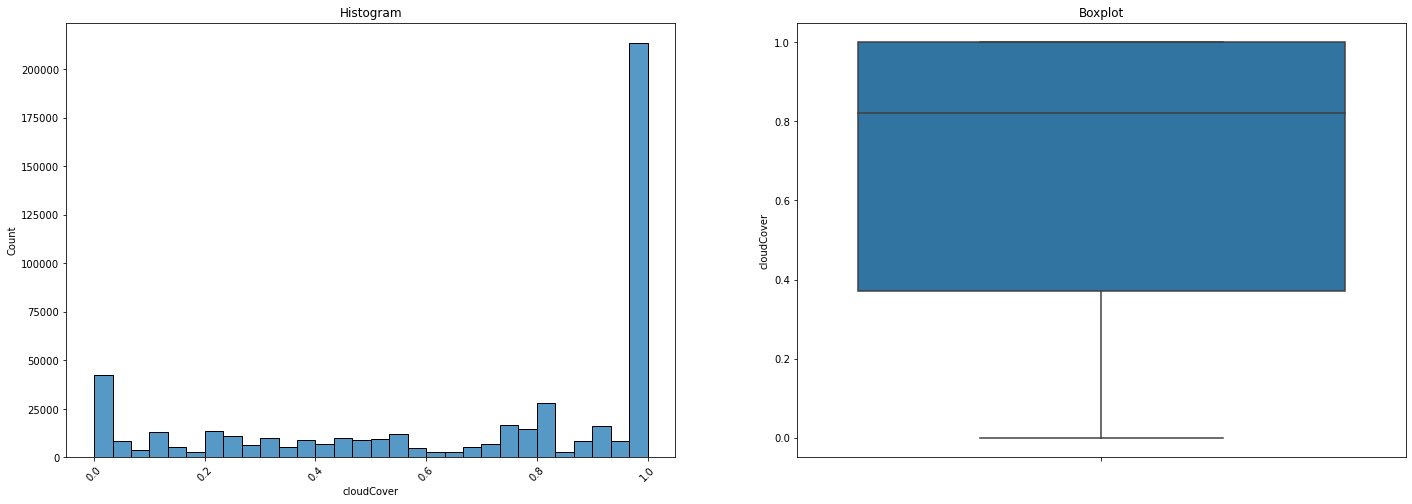

uvIndex


<Figure size 1152x288 with 0 Axes>

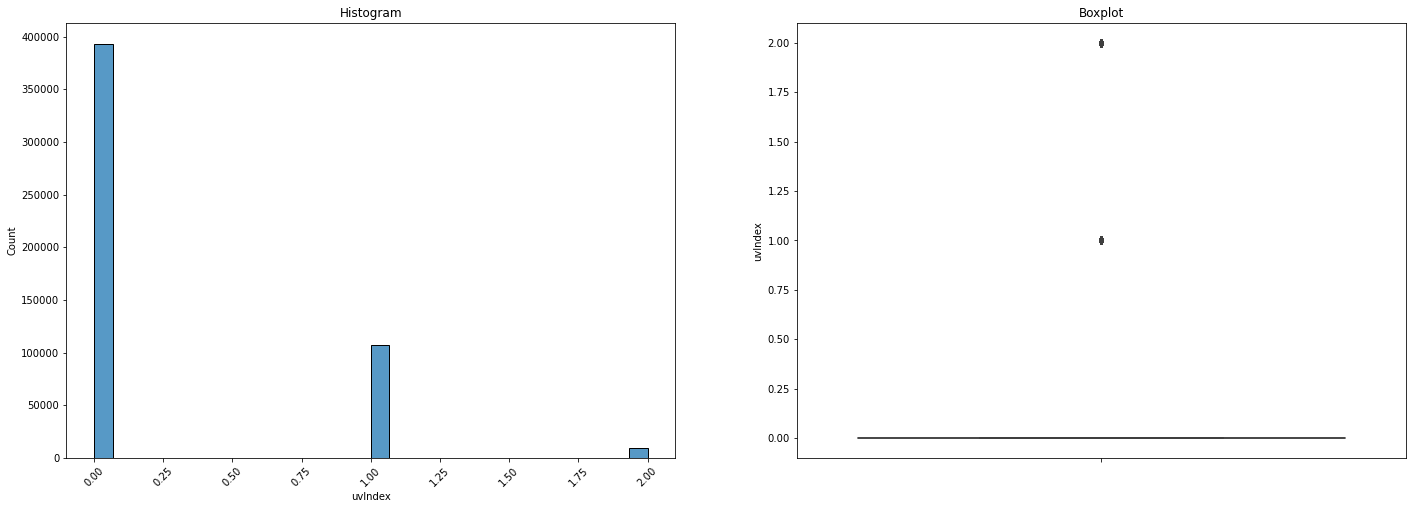

visibility.1


<Figure size 1152x288 with 0 Axes>

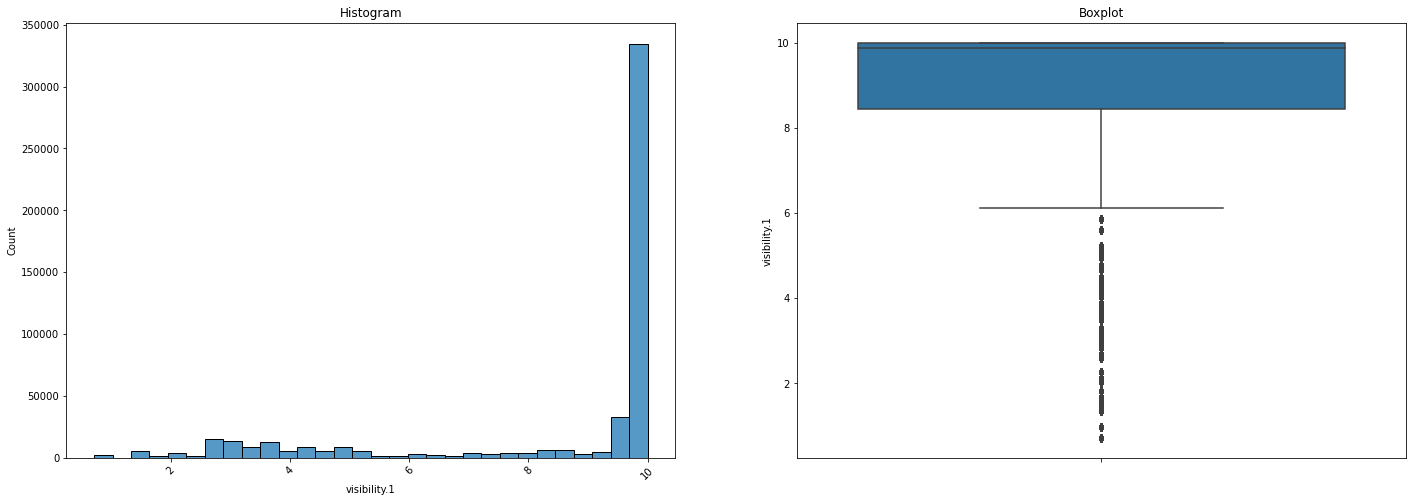

ozone


<Figure size 1152x288 with 0 Axes>

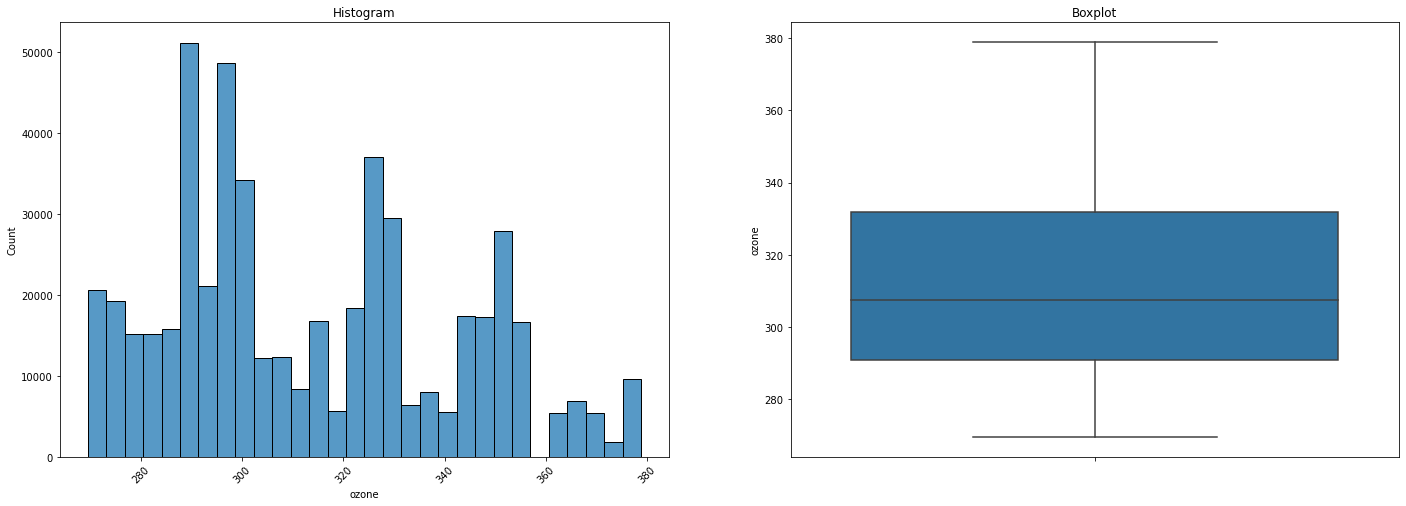

moonPhase


<Figure size 1152x288 with 0 Axes>

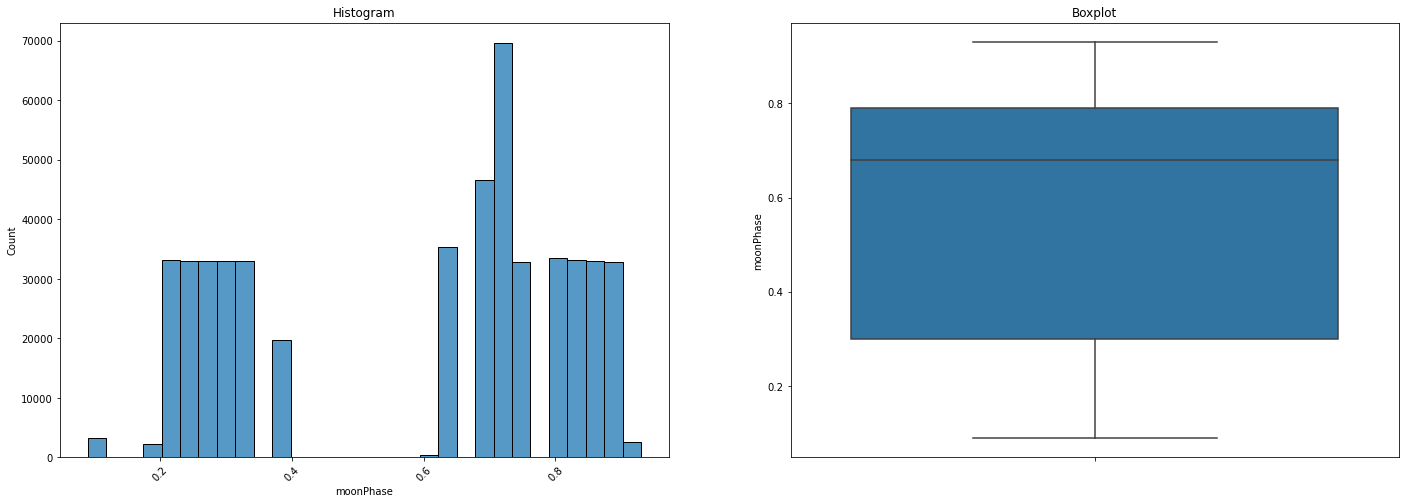

precipIntensityMax


<Figure size 1152x288 with 0 Axes>

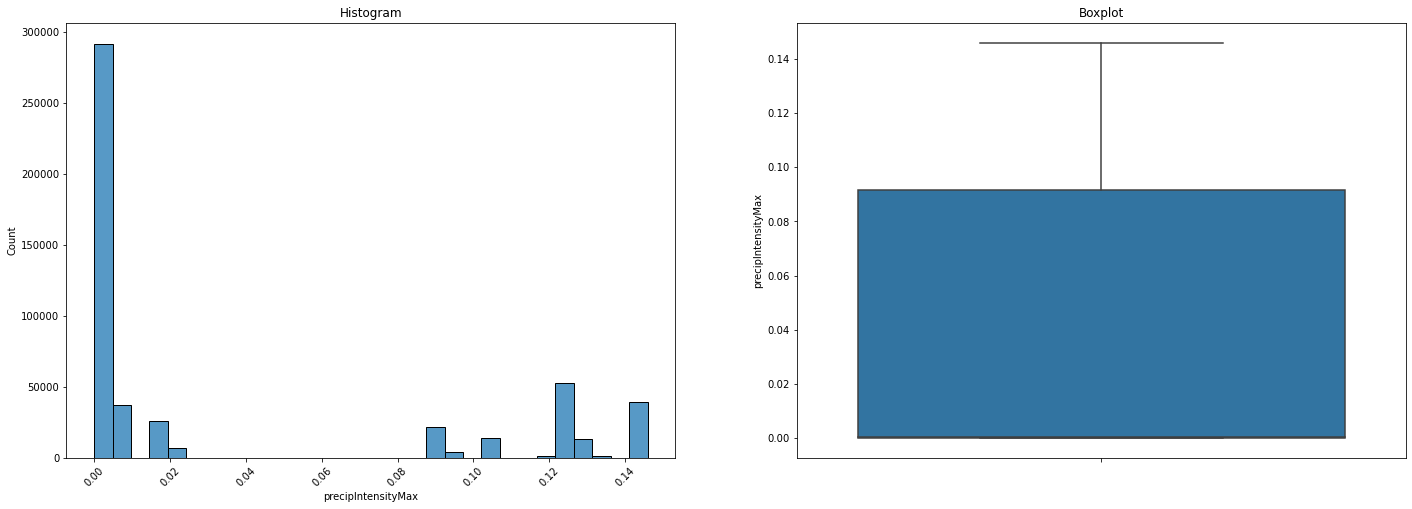

temperatureMin


<Figure size 1152x288 with 0 Axes>

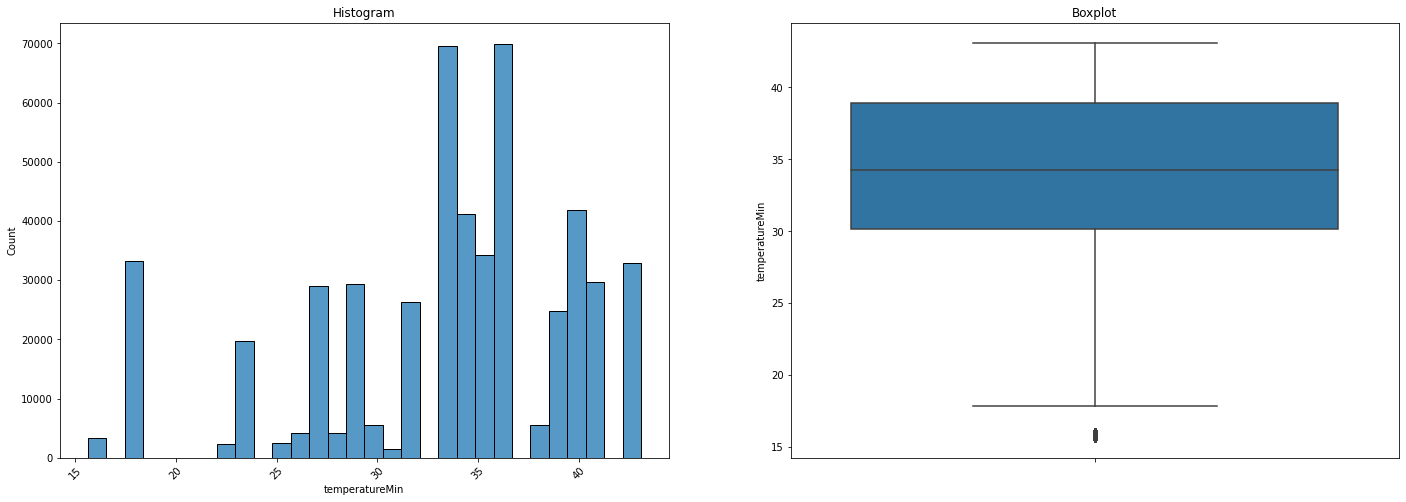

temperatureMax


<Figure size 1152x288 with 0 Axes>

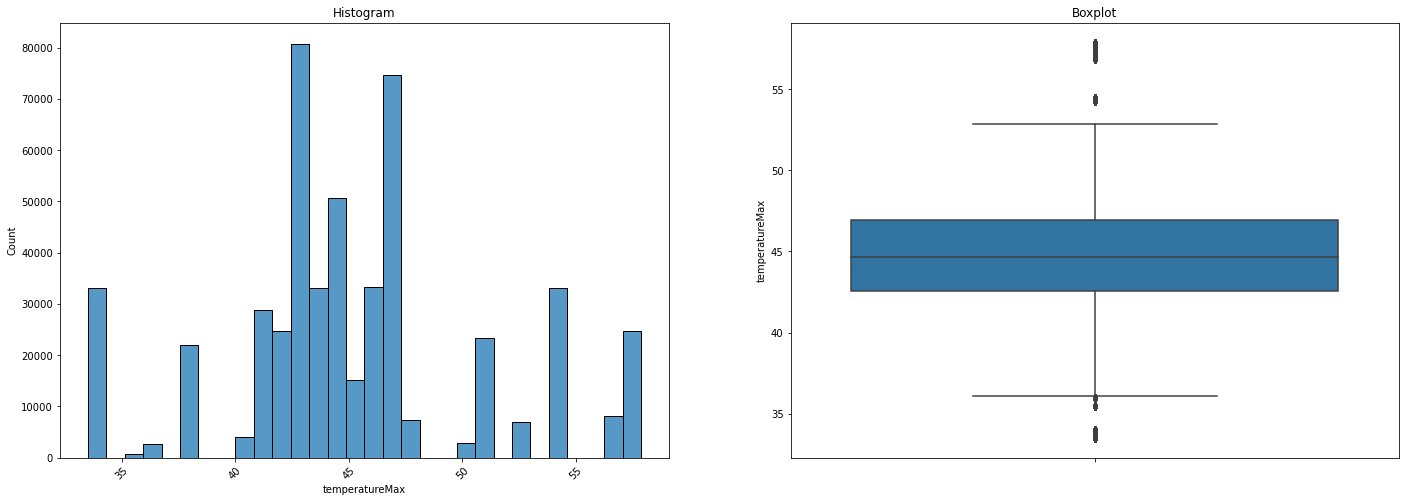

apparentTemperatureMin


<Figure size 1152x288 with 0 Axes>

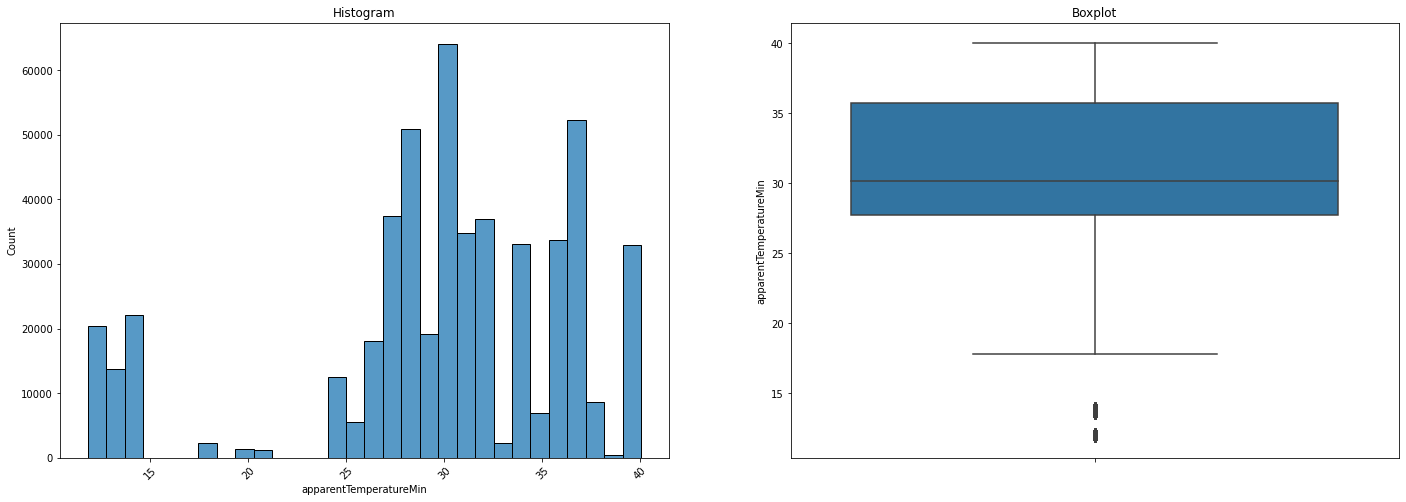

apparentTemperatureMax


<Figure size 1152x288 with 0 Axes>

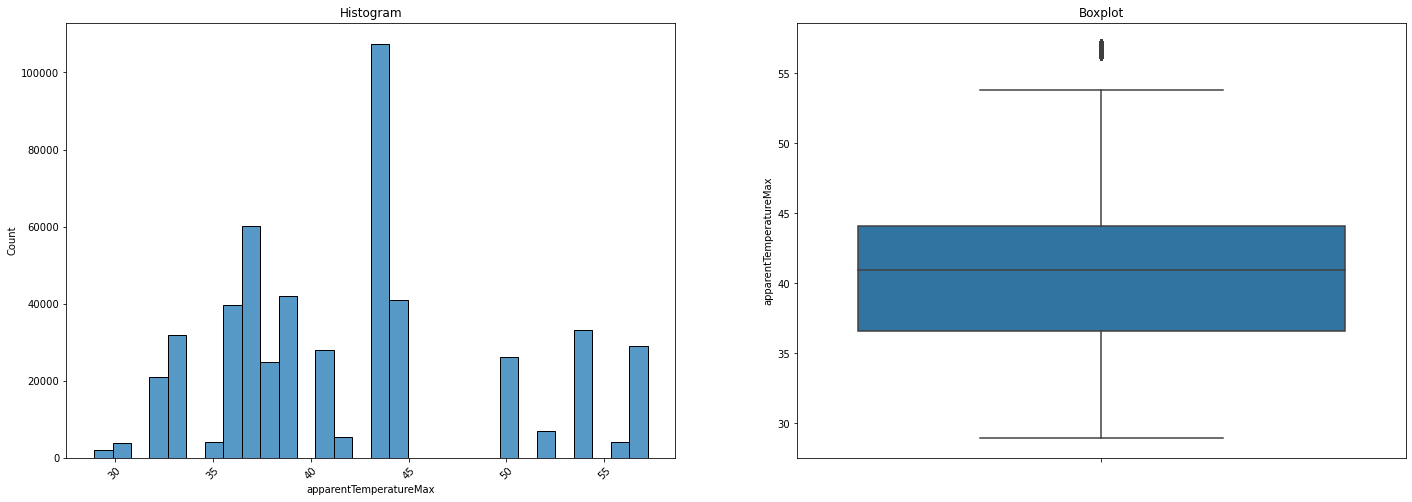

In [282]:
for col in X_train.columns:
    if 'time' not in col.lower():
        diagnostic_plots(X_train,col)

> hasil dari observ, column yang memiliki outlier adalah tempratureMin,visibility, distance
> namun asumsi dari saya tempratureMin dan visibility tidak mempengaruhi price jadi di abaikan

In [283]:
# Input Paramater Distribution  Check
dist_check = X_train.skew(numeric_only=True)

for i in range(len(dist_check)):
    if dist_check.values[i] < -0.5:
        print(dist_check.index[i], ': Negatively skewed distribution')
    elif dist_check.values[i] > 0.5:
        print(dist_check.index[i], ': Positively skewed distribution')
    else:
        print(dist_check.index[i], ': Normally distributed')
        

timestamp : Normally distributed
hour : Normally distributed
day : Normally distributed
month : Normally distributed
distance : Positively skewed distribution
surge_multiplier : Positively skewed distribution
latitude : Negatively skewed distribution
longitude : Normally distributed
temperature : Negatively skewed distribution
apparentTemperature : Normally distributed
precipIntensity : Positively skewed distribution
precipProbability : Positively skewed distribution
humidity : Normally distributed
windSpeed : Normally distributed
windGust : Positively skewed distribution
windGustTime : Normally distributed
visibility : Negatively skewed distribution
temperatureHigh : Normally distributed
temperatureHighTime : Normally distributed
temperatureLow : Normally distributed
temperatureLowTime : Normally distributed
apparentTemperatureHigh : Normally distributed
apparentTemperatureHighTime : Normally distributed
apparentTemperatureLow : Negatively skewed distribution
apparentTemperatureLowTim

In [284]:
# Outliers Detection Function
# for Normally Distributed Data

def detect1(data, parameter):

    threshold = 3
    mean_ = np.mean(data[parameter])
    std_ = np.std(data[parameter])

    result = data[
        abs((data[parameter]-mean_)/std_) > threshold
    ]
    return result


In [285]:
# Outliers Detection Function
# for Skew Distributed Data

def detect2(data, parameter):

    IQR = data[parameter].quantile(0.75) - data[parameter].quantile(0.25)
    upper = data[parameter].quantile(0.75) + (1.5*IQR)
    bottom = data[parameter].quantile(0.25) - (1.5*IQR)

    result = data[
        (data[parameter] > upper) |
        (data[parameter] < bottom)
    ]
    return result
    
    

In [286]:
# Outlier Check
# Input Parameter : `distance`

out_distance = detect1(X_train, parameter='distance')
print('Outliers count :', len(out_distance))
print('Total entries :', len(X_train['distance']))
print()
print('Outliers percentage :', len(out_distance)/len(X_train['distance'])*100)

Outliers count : 3371
Total entries : 510373

Outliers percentage : 0.6604973225464513


> Outlier disini terdeteksi hingga 0.7% , dan akan di biarkan saja


--- 
# Feature Selection


---

> Melihat korelasi feature

In [287]:
# membuat fungsi dataframe corelation
def plot_corr(data_train_test,y, size=11):
    _c = data_train_test.copy()
    _c['price'] = y.price
      
    corr = _c.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)),corr.columns)

> Creating the Correlation matrix and Selecting the Upper trigular matrix

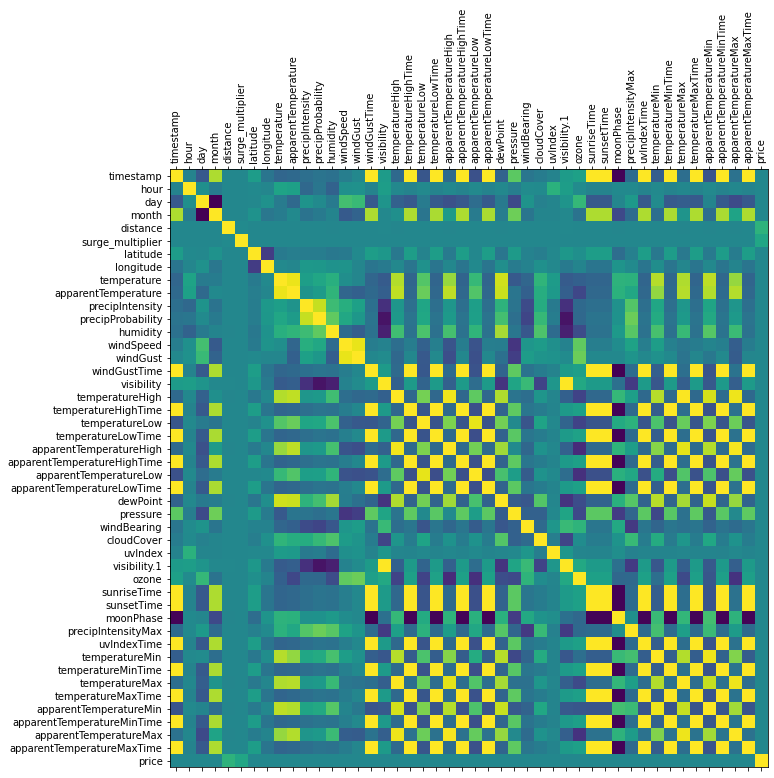

In [288]:
plot_corr(X, y)

> berdasarkan visualisasi yang di lakukan hasilnya adalah sangat banyak sekali feature yang berkorelasi, jadi kita harus membuang beberapa features

In [289]:
cor_matrix = X.corr().abs()
cor_matrix

,timestamp,hour,day,month,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,0.028497,0.341424,0.771246,0.003289,0.000612,0.168294,0.136709,0.249023,0.226465,...,0.211885,0.999364,0.307196,0.998195,0.186495,0.999290,0.378538,0.998288,0.157891,0.999276
hour,0.028497,1.000000,0.066226,0.079734,0.002279,0.000067,0.019235,0.005993,0.218831,0.198215,...,0.020290,0.027993,0.015670,0.027482,0.002987,0.028475,0.015885,0.028168,0.002909,0.028269
day,0.341424,0.066226,1.000000,0.861326,0.000995,0.001396,0.006751,0.078539,0.083926,0.223404,...,0.145794,0.341334,0.038093,0.334123,0.304702,0.344673,0.019874,0.335181,0.444365,0.344550
month,0.771246,0.079734,0.861326,1.000000,0.002404,0.000612,0.085941,0.126759,0.082051,0.024772,...,0.213302,0.770834,0.191931,0.765321,0.105111,0.773059,0.191295,0.766099,0.214926,0.772964
distance,0.003289,0.002279,0.000995,0.002404,1.000000,0.025947,0.000992,0.000430,0.002738,0.002833,...,0.000673,0.003297,0.003193,0.003165,0.003869,0.003317,0.003649,0.003266,0.003880,0.003318
surge_multiplier,0.000612,0.000067,0.001396,0.000612,0.025947,1.000000,0.001472,0.001961,0.001594,0.002586,...,0.000090,0.000585,0.000716,0.000594,0.001998,0.000563,0.001317,0.000503,0.002214,0.000559
latitude,0.168294,0.019235,0.006751,0.085941,0.000992,0.001472,1.000000,0.531444,0.098912,0.067433,...,0.047311,0.171975,0.114439,0.169740,0.109276,0.175335,0.096329,0.171068,0.082901,0.173358
longitude,0.136709,0.005993,0.078539,0.126759,0.000430,0.001961,0.531444,1.000000,0.012399,0.005903,...,0.030332,0.136614,0.048837,0.140268,0.007026,0.136942,0.010128,0.140393,0.022601,0.135519
temperature,0.249023,0.218831,0.083926,0.082051,0.002738,0.001594,0.098912,0.012399,1.000000,0.946157,...,0.333156,0.254750,0.789221,0.242987,0.780427,0.254167,0.817442,0.231806,0.703078,0.255574
apparentTemperature,0.226465,0.198215,0.223404,0.024772,0.002833,0.002586,0.067433,0.005903,0.946157,1.000000,...,0.257123,0.231519,0.697344,0.224962,0.792477,0.227923,0.786477,0.212673,0.782255,0.228884


In [290]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                             timestamp      hour       day     month  \
timestamp                          NaN  0.028497  0.341424  0.771246   
hour                               NaN       NaN  0.066226  0.079734   
day                                NaN       NaN       NaN  0.861326   
month                              NaN       NaN       NaN       NaN   
distance                           NaN       NaN       NaN       NaN   
surge_multiplier                   NaN       NaN       NaN       NaN   
latitude                           NaN       NaN       NaN       NaN   
longitude                          NaN       NaN       NaN       NaN   
temperature                        NaN       NaN       NaN       NaN   
apparentTemperature                NaN       NaN       NaN       NaN   
precipIntensity                    NaN       NaN       NaN       NaN   
precipProbability                  NaN       NaN       NaN       NaN   
humidity                           NaN       NaN       NaN      

> Droping the column with high correlation
- menyimpan data yang berkorelasi lebih dari 80% dan membuangnya

In [291]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print(); print(to_drop)


['month', 'apparentTemperature', 'precipProbability', 'windGust', 'windGustTime', 'temperatureHigh', 'temperatureHighTime', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'visibility.1', 'sunriseTime', 'sunsetTime', 'moonPhase', 'uvIndexTime', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']


> membuang features yang memiliki korelasi di atas 80% antara lain

['month', 'apparentTemperature', 'precipProbability', 'windGust', 'windGustTime', 'temperatureHigh', 'temperatureHighTime', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'visibility.1', 'sunriseTime', 'sunsetTime', 'moonPhase', 'uvIndexTime', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']

In [292]:
X_train.drop(columns=to_drop, axis=1, inplace=True)
X_test.drop(columns=to_drop, axis=1, inplace=True)
X_train

,timestamp,hour,day,datetime,timezone,source,destination,cab_type,name,distance,...,visibility,temperatureLow,icon,pressure,windBearing,cloudCover,uvIndex,ozone,precipIntensityMax,temperatureMin
224115,1.543363e+09,0,28,2018-11-28 00:00:22,America/New_York,Haymarket Square,Beacon Hill,Uber,Black,0.91,...,10.000,33.75,clear-night,991.99,246,0.12,0,315.1,0.1433,36.13
401697,1.543605e+09,19,30,2018-11-30 19:13:05,America/New_York,Haymarket Square,Theatre District,Uber,UberPool,1.16,...,9.975,31.48,cloudy,1016.07,252,1.00,1,274.1,0.0004,28.64
369465,1.543441e+09,21,28,2018-11-28 21:29:08,America/New_York,North Station,Haymarket Square,Uber,Black SUV,0.56,...,10.000,37.33,cloudy,993.87,295,1.00,0,355.2,0.0000,33.70
259773,1.543290e+09,3,27,2018-11-27 03:33:21,America/New_York,North End,Back Bay,Uber,Black,2.62,...,4.503,41.90,rain,1001.71,79,1.00,0,290.3,0.1225,40.45
507441,1.543416e+09,14,28,2018-11-28 14:35:08,America/New_York,North End,Back Bay,Uber,WAV,2.84,...,9.908,37.44,partly-cloudy-day,991.71,290,0.37,1,350.4,0.0000,33.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560871,1.543464e+09,4,29,2018-11-29 04:08:08,America/New_York,West End,Haymarket Square,Lyft,Lux Black,0.71,...,10.000,37.33,partly-cloudy-night,998.75,303,0.59,0,346.7,0.0000,33.70
136518,1.545101e+09,2,18,2018-12-18 02:45:03,America/New_York,North End,Financial District,Lyft,Lux,1.18,...,9.880,23.89,partly-cloudy-night,1001.12,279,0.68,0,369.3,0.0178,34.07
534340,1.543720e+09,3,2,2018-12-02 03:02:56,America/New_York,Haymarket Square,West End,Uber,UberX,0.62,...,9.920,34.95,partly-cloudy-night,1023.35,133,0.81,0,273.2,0.0000,31.65
322597,1.543327e+09,13,27,2018-11-27 13:51:23,America/New_York,Financial District,South Station,Lyft,Lyft,0.46,...,3.231,33.83,rain,988.09,227,1.00,0,322.8,0.1429,36.37


In [293]:
X_train.drop(['visibility'], axis=1, inplace=True)
X_test.drop(['visibility'], axis=1, inplace=True)

In [294]:
X_test.shape

(127594, 28)

In [295]:
X_test

,timestamp,hour,day,datetime,timezone,source,destination,cab_type,name,distance,...,windSpeed,temperatureLow,icon,pressure,windBearing,cloudCover,uvIndex,ozone,precipIntensityMax,temperatureMin
345383,1.544998e+09,22,16,2018-12-16 22:05:07,America/New_York,North Station,Fenway,Lyft,Lyft,3.15,...,8.02,34.24,rain,1013.45,60,0.96,0,322.8,0.1254,38.94
430329,1.543699e+09,21,1,2018-12-01 21:13:02,America/New_York,Financial District,North End,Lyft,Lux,1.26,...,3.03,34.58,partly-cloudy-night,1023.13,99,0.54,0,271.9,0.0000,30.17
58493,1.543776e+09,18,2,2018-12-02 18:33:03,America/New_York,South Station,Theatre District,Uber,UberX,1.30,...,4.88,44.88,rain,1006.41,129,1.00,1,282.8,0.0894,36.40
235494,1.543720e+09,3,2,2018-12-02 03:08:02,America/New_York,Beacon Hill,Fenway,Lyft,Lyft,2.45,...,1.71,34.95,partly-cloudy-night,1023.35,133,0.81,0,273.2,0.0000,31.65
265563,1.544924e+09,1,16,2018-12-16 01:35:07,America/New_York,South Station,North Station,Uber,Black,1.50,...,4.70,38.94,partly-cloudy-night,1024.34,44,0.19,0,297.4,0.0074,39.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57594,1.543252e+09,17,26,2018-11-26 17:02:12,America/New_York,North Station,Boston University,Uber,Black SUV,3.01,...,4.22,41.90,cloudy,1012.59,114,1.00,1,294.0,0.1225,40.45
191794,1.545021e+09,4,17,2018-12-17 04:35:05,America/New_York,West End,North End,Uber,Black SUV,1.06,...,10.45,34.19,rain,1007.02,41,1.00,0,328.1,0.1276,39.89
553887,1.543855e+09,16,3,2018-12-03 16:38:02,America/New_York,Fenway,Back Bay,Lyft,Lyft XL,1.65,...,7.85,32.80,partly-cloudy-day,999.27,242,0.20,2,300.6,0.0007,42.96
527393,1.543596e+09,16,30,2018-11-30 16:33:02,America/New_York,Boston University,West End,Lyft,Lux,3.14,...,3.46,31.57,clear-day,1016.84,291,0.12,2,269.9,0.0004,28.64


> hasil dari penghapusan feature yang berkorelasi. data/feature yang awalnya 57 sudah di kurangi menjadi 28

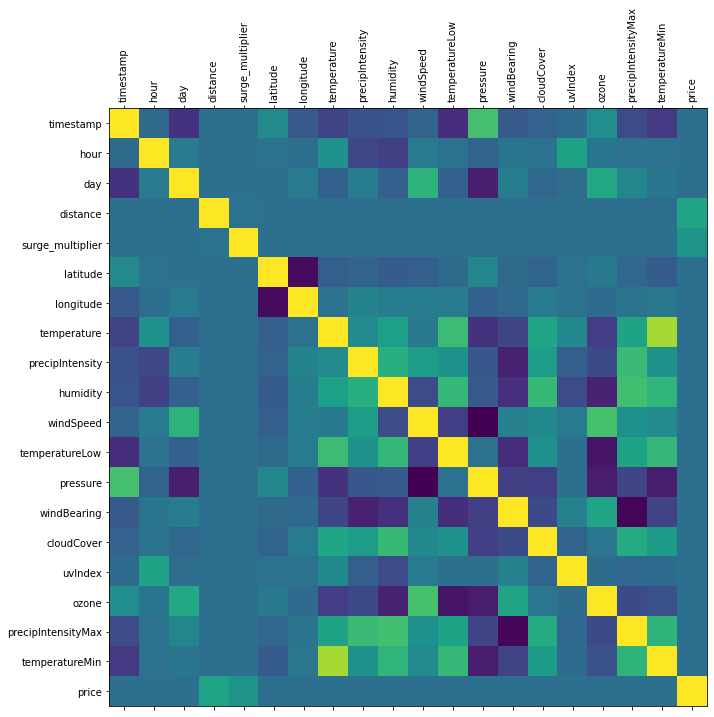

In [296]:
plot_corr(X_train,y_train)

>Sekarang, dataset hanya memiliki kolom-kolom dengan korelasi kurang dari 0,8

> Dengan plot corr di atas kita bisa memilah kembali apa saja features yang  akan kita gunakan, jika menggunakan 31 featuress di takutkan modell menjadi tidak efektif. 
> Disini saya memutuskan untuk menentukan **label = price** dan features yang di gunakan adalah  

Numeric Columns :  ['timestamp', 'hour', 'day', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'precipIntensity', 'humidity', 'windSpeed', 'visibility', 'temperatureLow', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'precipIntensityMax', 'temperatureMin']


Categorical Columns :  ['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary', 'long_summary', 'icon']

---
Split Numerical Columns and Categorical Columns

In [297]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

cat_columns.remove('datetime')

print('Numeric Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numeric Columns :  ['timestamp', 'hour', 'day', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'precipIntensity', 'humidity', 'windSpeed', 'temperatureLow', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'precipIntensityMax', 'temperatureMin']
Categorical Columns :  ['timezone', 'source', 'destination', 'cab_type', 'name', 'short_summary', 'long_summary', 'icon']


In [298]:
# Split train-set and test-set based on column type (numerical/categorical)

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

---
## Feature Scaling

In [299]:
# Feature Scaling using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.08154676, 0.        , 0.93103448, ..., 0.4173516 , 0.98217958,
        0.74626866],
       [0.20519504, 0.82608696, 1.        , ..., 0.04292237, 0.0027416 ,
        0.47360757],
       [0.121062  , 0.91304348, 0.93103448, ..., 0.78356164, 0.        ,
        0.65780852],
       ...,
       [0.2637535 , 0.13043478, 0.03448276, ..., 0.0347032 , 0.        ,
        0.58318165],
       [0.06287506, 0.56521739, 0.89655172, ..., 0.48767123, 0.97943797,
        0.75500546],
       [0.82277367, 0.7826087 , 0.44827586, ..., 0.17442922, 0.        ,
        0.42045868]])

---
## Feature Encoding

In [300]:
# Feature Encoding using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder.fit(X_train_cat)

X_train_cat_enc = encoder.transform(X_train_cat)
X_test_cat_enc = encoder.transform(X_test_cat)
X_train_cat_enc

array([[ 0.,  5.,  1., ...,  0.,  2.,  1.],
       [ 0.,  5., 10., ...,  5.,  4.,  2.],
       [ 0.,  7.,  5., ...,  5.,  4.,  2.],
       ...,
       [ 0.,  5., 11., ...,  4.,  1.,  5.],
       [ 0.,  4.,  9., ...,  7.,  2.,  6.],
       [ 0.,  2., 10., ...,  4.,  6.,  4.]])

---
## Concat between Numerical Columns and Categorical Columns

In [301]:
# Concate columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_enc], axis=1)

X_train_final

array([[0.08154676, 0.        , 0.93103448, ..., 0.        , 2.        ,
        1.        ],
       [0.20519504, 0.82608696, 1.        , ..., 5.        , 4.        ,
        2.        ],
       [0.121062  , 0.91304348, 0.93103448, ..., 5.        , 4.        ,
        2.        ],
       ...,
       [0.2637535 , 0.13043478, 0.03448276, ..., 4.        , 1.        ,
        5.        ],
       [0.06287506, 0.56521739, 0.89655172, ..., 7.        , 2.        ,
        6.        ],
       [0.82277367, 0.7826087 , 0.44827586, ..., 4.        , 6.        ,
        4.        ]])

In [302]:
# Display concate's result as a dataframe

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_train_final_df

,timestamp,hour,day,distance,surge_multiplier,latitude,longitude,temperature,precipIntensity,humidity,...,precipIntensityMax,temperatureMin,timezone,source,destination,cab_type,name,short_summary,long_summary,icon
0,0.081547,0.000000,0.931034,0.113520,0.00,1.000000,0.584254,0.527800,0.000000,0.603448,...,0.982180,0.746269,0.0,5.0,1.0,1.0,0.0,0.0,2.0,1.0
1,0.205195,0.826087,1.000000,0.145408,0.00,0.988764,0.542818,0.590446,0.000000,0.293103,...,0.002742,0.473608,0.0,5.0,10.0,1.0,8.0,5.0,4.0,2.0
2,0.121062,0.913043,0.931034,0.068878,0.00,0.906147,0.694751,0.585748,0.000000,0.379310,...,0.000000,0.657809,0.0,7.0,5.0,1.0,1.0,5.0,4.0,2.0
3,0.043925,0.130435,0.896552,0.331633,0.00,1.000000,0.584254,0.647873,0.751900,0.879310,...,0.839616,0.903531,0.0,6.0,0.0,1.0,0.0,8.0,10.0,6.0
4,0.108369,0.608696,0.931034,0.359694,0.00,1.000000,0.584254,0.524928,0.000000,0.465517,...,0.000000,0.659629,0.0,6.0,0.0,1.0,11.0,6.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510368,0.133296,0.173913,0.965517,0.088010,0.00,0.906147,0.694751,0.503002,0.000000,0.551724,...,0.000000,0.657809,0.0,11.0,5.0,0.0,3.0,4.0,4.0,5.0
510369,0.969642,0.086957,0.586207,0.147959,0.00,0.906147,0.567680,0.473767,0.000000,0.534483,...,0.122001,0.671278,0.0,6.0,4.0,0.0,2.0,4.0,2.0,5.0
510370,0.263754,0.130435,0.034483,0.076531,0.00,0.951751,0.479282,0.475072,0.000000,0.793103,...,0.000000,0.583182,0.0,5.0,11.0,1.0,9.0,4.0,1.0,5.0
510371,0.062875,0.565217,0.896552,0.056122,0.00,0.951751,0.479282,0.679457,0.048376,0.965517,...,0.979438,0.755005,0.0,4.0,9.0,0.0,5.0,7.0,2.0,6.0


# 6 - Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [303]:
# Training using LinearRegression & etc

model_lr = LinearRegression(fit_intercept=True)
model_el = ElasticNet(alpha=0.5, l1_ratio=0.3) #featurnya banyak jadi l1 =0.3 dan l2=0.7
model_ridge = Ridge(alpha=0.5)
model_lasso = Lasso(alpha=0.5)

Metrics yang akan dipakai adalah `MAE (Mean Absolute Error)`.

# 7 - Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [304]:
# Train the model


model_lr.fit(X_train_final, y_train)
model_lr.score(X_train_final, y_train)

0.5141623391789448

In [305]:
# Get prediction of train-set and test-set

y_pred_train = model_lr.predict(X_train_final)
y_pred_test = model_lr.predict(X_test_final)
y_pred_test


array([[18.63945292],
       [18.05517475],
       [ 9.42883062],
       ...,
       [12.58540352],
       [23.3910301 ],
       [14.30730462]])

# 8 - Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [306]:


print('==================== TRAIN ====================')
print('MAE:',mean_absolute_error(y_train,y_pred_train))
print('MSE:',mean_squared_error(y_train,y_pred_train))
print('RMSE:',mean_squared_error(y_train,y_pred_train,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_pred_train))
print('R2 Score:',r2_score(y_train,y_pred_train))

print('==================== TEST ====================')
print('MAE:',mean_absolute_error(y_test,y_pred_test))
print('MSE:',mean_squared_error(y_test,y_pred_test))
print('RMSE:',mean_squared_error(y_test,y_pred_test,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred_test))
print('R2 Score:',r2_score(y_test,y_pred_test))

==================== TRAIN ====================
MAE: 5.163302869399377
MSE: 42.18178229272785
RMSE: 6.494750364157798
MAPE: 0.3939325395180115
R2 Score: 0.5141623391789448
==================== TEST ====================
MAE: 5.173261384293839
MSE: 42.46242571572639
RMSE: 6.516319951915068
MAPE: 0.3953993764237577
R2 Score: 0.5143119898813888


# 9 - Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [308]:
# Display inference-set

data_inf_1 = data_inf.copy()
data_inf['name'] = data_inf_1.name.str.replace('Taxi', 'Black')
data_inf

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,name,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.543421e+09,16,28,11,2018-11-28 16:05:07,America/New_York,Financial District,South Station,Uber,Black,...,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1543399200,36.58,1543438800
1,1.543693e+09,19,1,12,2018-12-01 19:42:59,America/New_York,Theatre District,Northeastern University,Lyft,Lyft,...,0.0000,1543683600,31.55,1543658400,44.72,1543690800,27.95,1543658400,44.05,1543690800
2,1.545138e+09,12,18,12,2018-12-18 12:55:11,America/New_York,Haymarket Square,Theatre District,Uber,Black,...,0.0056,1545152400,22.98,1545192000,37.95,1545109200,12.13,1545134400,32.03,1545109200
3,1.545055e+09,13,17,12,2018-12-17 13:55:03,America/New_York,Financial District,Boston University,Uber,WAV,...,0.0175,1545066000,34.14,1545044400,41.44,1545076800,28.12,1545044400,35.95,1545076800
4,1.543448e+09,23,28,11,2018-11-28 23:41:08,America/New_York,Northeastern University,Financial District,Uber,Black,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
5,1.544926e+09,2,16,12,2018-12-16 02:00:13,America/New_York,Financial District,Haymarket Square,Lyft,Lux Black XL,...,0.0082,1544893200,39.74,1544929200,54.29,1544896800,37.04,1544929200,53.62,1544896800
6,1.543316e+09,10,27,11,2018-11-27 10:57:21,America/New_York,Beacon Hill,Northeastern University,Uber,UberX,...,0.1425,1543338000,36.34,1543377600,46.91,1543320000,32.43,1543377600,44.01,1543320000
7,1.543794e+09,23,2,12,2018-12-02 23:37:57,America/New_York,Financial District,Haymarket Square,Lyft,Lux,...,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
8,1.543800e+09,1,3,12,2018-12-03 01:27:59,America/New_York,Boston University,Theatre District,Uber,UberPool,...,0.0888,1543770000,36.60,1543726800,50.99,1543788000,35.85,1543748400,50.32,1543788000
9,1.543565e+09,7,30,11,2018-11-30 07:58:03,America/New_York,South Station,North Station,Uber,Black SUV,...,0.0003,1543593600,28.78,1543579200,42.64,1543600800,26.35,1543575600,40.61,1543611600


In [309]:
# Remove column 

data_inf2 = data_inf.drop(['month', 'apparentTemperature', 'precipProbability', 'windGust', 'windGustTime', 'temperatureHigh', 'temperatureHighTime', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'visibility.1', 'sunriseTime', 'sunsetTime', 'moonPhase', 'uvIndexTime', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime'], axis=1)
data_inf2

,timestamp,hour,day,datetime,timezone,source,destination,cab_type,name,price,...,visibility,temperatureLow,icon,pressure,windBearing,cloudCover,uvIndex,ozone,precipIntensityMax,temperatureMin
0,1.543421e+09,16,28,2018-11-28 16:05:07,America/New_York,Financial District,South Station,Uber,Black,NaN,...,10.000,37.44,partly-cloudy-day,991.41,297,0.81,1,352.0,0.0000,33.75
1,1.543693e+09,19,1,2018-12-01 19:42:59,America/New_York,Theatre District,Northeastern University,Lyft,Lyft,9.0,...,9.815,34.90,partly-cloudy-day,1022.41,121,0.42,1,273.9,0.0000,31.55
2,1.545138e+09,12,18,2018-12-18 12:55:11,America/New_York,Haymarket Square,Theatre District,Uber,Black,16.5,...,9.948,20.72,partly-cloudy-night,1007.14,314,0.78,0,371.4,0.0056,22.98
3,1.545055e+09,13,17,2018-12-17 13:55:03,America/New_York,Financial District,Boston University,Uber,WAV,15.0,...,8.459,23.93,cloudy,1004.17,329,1.00,0,325.3,0.0175,34.14
4,1.543448e+09,23,28,2018-11-28 23:41:08,America/New_York,Northeastern University,Financial District,Uber,Black,30.5,...,10.000,36.71,cloudy,995.30,293,1.00,0,355.0,0.0001,33.10
5,1.544926e+09,2,16,2018-12-16 02:00:13,America/New_York,Financial District,Haymarket Square,Lyft,Lux Black XL,27.5,...,9.827,38.48,partly-cloudy-night,1024.46,36,0.14,0,296.6,0.0082,39.74
6,1.543316e+09,10,27,2018-11-27 10:57:21,America/New_York,Beacon Hill,Northeastern University,Uber,UberX,9.5,...,2.686,33.82,rain,989.98,79,1.00,0,296.2,0.1425,36.34
7,1.543794e+09,23,2,2018-12-02 23:37:57,America/New_York,Financial District,Haymarket Square,Lyft,Lux,10.5,...,7.790,44.99,cloudy,1002.81,275,1.00,0,287.3,0.0904,36.45
8,1.543800e+09,1,3,2018-12-03 01:27:59,America/New_York,Boston University,Theatre District,Uber,UberPool,10.0,...,4.315,45.04,cloudy,1002.81,299,1.00,0,288.1,0.0888,36.60
9,1.543565e+09,7,30,2018-11-30 07:58:03,America/New_York,South Station,North Station,Uber,Black SUV,28.0,...,9.944,31.57,clear-night,1014.74,319,0.00,0,286.9,0.0003,28.78


In [310]:
# Split Numerical Columns and Categorical Columns

data_inf_num = data_inf2[num_columns]
data_inf_cat = data_inf2[cat_columns]

In [311]:
# Feature Scaling & Feature Encoding

data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_enc = encoder.transform(data_inf_cat)

In [312]:
# Concatenate between Numerical Columns and Categorical Columns

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_enc], axis=1)
data_inf_final_df = pd.DataFrame(data_inf_final, columns=[num_columns + cat_columns])
data_inf_final_df

,timestamp,hour,day,distance,surge_multiplier,latitude,longitude,temperature,precipIntensity,humidity,...,precipIntensityMax,temperatureMin,timezone,source,destination,cab_type,name,short_summary,long_summary,icon
0,0.111128,0.695652,0.931034,0.047194,0.0,1.000000,0.584254,0.580788,0.000000,0.396552,...,0.000000,0.659629,0.0,4.0,9.0,1.0,0.0,4.0,4.0,4.0
1,0.250264,0.826087,0.000000,0.278061,0.0,1.000000,0.584254,0.654659,0.000000,0.241379,...,0.000000,0.579541,0.0,10.0,8.0,0.0,5.0,6.0,1.0,4.0
2,0.988349,0.521739,0.586207,0.145408,0.0,0.846662,0.070442,0.148786,0.000000,0.206897,...,0.038382,0.267565,0.0,5.0,10.0,1.0,0.0,4.0,4.0,5.0
3,0.946033,0.565217,0.551724,0.724490,0.0,0.906147,0.694751,0.424954,0.000000,0.879310,...,0.119945,0.673826,0.0,4.0,2.0,1.0,11.0,5.0,2.0,2.0
4,0.125109,1.000000,0.931034,0.577806,0.0,0.000000,1.000000,0.533542,0.000000,0.534483,...,0.000685,0.635967,0.0,8.0,4.0,1.0,0.0,5.0,4.0,2.0
5,0.879962,0.086957,0.517241,0.122449,0.0,0.896894,0.000000,0.573218,0.000000,0.551724,...,0.056203,0.877685,0.0,4.0,5.0,0.0,4.0,6.0,4.0,5.0
6,0.057539,0.434783,0.896552,0.242347,0.0,0.895572,0.337017,0.692770,0.431237,0.948276,...,0.976696,0.753913,0.0,1.0,8.0,1.0,9.0,3.0,2.0,6.0
7,0.301621,1.000000,0.034483,0.127551,0.0,0.951751,0.479282,0.780997,0.000000,1.000000,...,0.619602,0.757918,0.0,4.0,5.0,0.0,2.0,5.0,3.0,2.0
8,0.304994,0.043478,0.068966,0.377551,0.0,0.990747,0.707182,0.757505,0.000000,0.982759,...,0.608636,0.763378,0.0,2.0,10.0,1.0,8.0,5.0,3.0,2.0
9,0.184498,0.304348,1.000000,0.232143,0.0,0.932584,0.696133,0.300444,0.000000,0.810345,...,0.002056,0.478704,0.0,9.0,7.0,1.0,1.0,0.0,4.0,1.0


In [313]:
# Predict Inference-Set

y_pred_inf = model_lr.predict(data_inf_final_df)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Price - Prediction'])
y_pred_inf_df

,Price - Prediction
0,21.292451
1,16.131203
2,23.490610
3,18.295052
4,32.973119
5,14.029251
6,10.862770
7,17.456085
8,15.543270
9,23.851903


In [314]:
# Concat Inference-Set with Prediction

pd.concat([data_inf, y_pred_inf_df], axis=1)

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,name,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Price - Prediction
0,1.543421e+09,16,28,11,2018-11-28 16:05:07,America/New_York,Financial District,South Station,Uber,Black,...,1543420800,33.75,1543399200,42.60,1543438800,29.97,1543399200,36.58,1543438800,21.292451
1,1.543693e+09,19,1,12,2018-12-01 19:42:59,America/New_York,Theatre District,Northeastern University,Lyft,Lyft,...,1543683600,31.55,1543658400,44.72,1543690800,27.95,1543658400,44.05,1543690800,16.131203
2,1.545138e+09,12,18,12,2018-12-18 12:55:11,America/New_York,Haymarket Square,Theatre District,Uber,Black,...,1545152400,22.98,1545192000,37.95,1545109200,12.13,1545134400,32.03,1545109200,23.490610
3,1.545055e+09,13,17,12,2018-12-17 13:55:03,America/New_York,Financial District,Boston University,Uber,WAV,...,1545066000,34.14,1545044400,41.44,1545076800,28.12,1545044400,35.95,1545076800,18.295052
4,1.543448e+09,23,28,11,2018-11-28 23:41:08,America/New_York,Northeastern University,Financial District,Uber,Black,...,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,32.973119
5,1.544926e+09,2,16,12,2018-12-16 02:00:13,America/New_York,Financial District,Haymarket Square,Lyft,Lux Black XL,...,1544893200,39.74,1544929200,54.29,1544896800,37.04,1544929200,53.62,1544896800,14.029251
6,1.543316e+09,10,27,11,2018-11-27 10:57:21,America/New_York,Beacon Hill,Northeastern University,Uber,UberX,...,1543338000,36.34,1543377600,46.91,1543320000,32.43,1543377600,44.01,1543320000,10.862770
7,1.543794e+09,23,2,12,2018-12-02 23:37:57,America/New_York,Financial District,Haymarket Square,Lyft,Lux,...,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000,17.456085
8,1.543800e+09,1,3,12,2018-12-03 01:27:59,America/New_York,Boston University,Theatre District,Uber,UberPool,...,1543770000,36.60,1543726800,50.99,1543788000,35.85,1543748400,50.32,1543788000,15.543270
9,1.543565e+09,7,30,11,2018-11-30 07:58:03,America/New_York,South Station,North Station,Uber,Black SUV,...,1543593600,28.78,1543579200,42.64,1543600800,26.35,1543575600,40.61,1543611600,23.851903


In [315]:
# Determines prediction result
y_pred_inf = model_lr.predict(data_inf_final_df)

data_inf_final_df['prediction'] = y_pred_inf
data_inf_final_df
# print(classification_report(y_inf, y_pred_inf))

,timestamp,hour,day,distance,surge_multiplier,latitude,longitude,temperature,precipIntensity,humidity,...,temperatureMin,timezone,source,destination,cab_type,name,short_summary,long_summary,icon,prediction
0,0.111128,0.695652,0.931034,0.047194,0.0,1.000000,0.584254,0.580788,0.000000,0.396552,...,0.659629,0.0,4.0,9.0,1.0,0.0,4.0,4.0,4.0,21.292451
1,0.250264,0.826087,0.000000,0.278061,0.0,1.000000,0.584254,0.654659,0.000000,0.241379,...,0.579541,0.0,10.0,8.0,0.0,5.0,6.0,1.0,4.0,16.131203
2,0.988349,0.521739,0.586207,0.145408,0.0,0.846662,0.070442,0.148786,0.000000,0.206897,...,0.267565,0.0,5.0,10.0,1.0,0.0,4.0,4.0,5.0,23.490610
3,0.946033,0.565217,0.551724,0.724490,0.0,0.906147,0.694751,0.424954,0.000000,0.879310,...,0.673826,0.0,4.0,2.0,1.0,11.0,5.0,2.0,2.0,18.295052
4,0.125109,1.000000,0.931034,0.577806,0.0,0.000000,1.000000,0.533542,0.000000,0.534483,...,0.635967,0.0,8.0,4.0,1.0,0.0,5.0,4.0,2.0,32.973119
5,0.879962,0.086957,0.517241,0.122449,0.0,0.896894,0.000000,0.573218,0.000000,0.551724,...,0.877685,0.0,4.0,5.0,0.0,4.0,6.0,4.0,5.0,14.029251
6,0.057539,0.434783,0.896552,0.242347,0.0,0.895572,0.337017,0.692770,0.431237,0.948276,...,0.753913,0.0,1.0,8.0,1.0,9.0,3.0,2.0,6.0,10.862770
7,0.301621,1.000000,0.034483,0.127551,0.0,0.951751,0.479282,0.780997,0.000000,1.000000,...,0.757918,0.0,4.0,5.0,0.0,2.0,5.0,3.0,2.0,17.456085
8,0.304994,0.043478,0.068966,0.377551,0.0,0.990747,0.707182,0.757505,0.000000,0.982759,...,0.763378,0.0,2.0,10.0,1.0,8.0,5.0,3.0,2.0,15.543270
9,0.184498,0.304348,1.000000,0.232143,0.0,0.932584,0.696133,0.300444,0.000000,0.810345,...,0.478704,0.0,9.0,7.0,1.0,1.0,0.0,4.0,1.0,23.851903


# 10 - Pengambilan Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

> Pada model yang sudah saya buat ini , tinggat erornya sebesar 

==================== TRAIN ====================
- MAE: 5.163302869399377


==================== TEST ====================
- MAE: 5.173261384293839

***Jadi*** model tidak terjadi overfitting di karenaka hasil eror training dan test tidak berbeda jauh